In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
rental = pd.read_csv("house.csv")

In [3]:
rental.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
print(rental.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Handling the NULL data

In [5]:

rental['Alley'].astype('category').value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [6]:

rental['LotFrontage'].astype('category').value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
38.0       1
39.0       1
111.0      1
112.0      1
128.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [7]:
rental['FireplaceQu'].astype('category').value_counts()


Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

### The following columns have most of the data columns as NULL
Alley, Fireplace, pool, fence, miscfeature. 

Cannot fill in more than 75% of the data with placeholder one

In [8]:
rental.drop(columns=['Alley', 'FireplaceQu', 'Fence', 'PoolQC', 'MiscFeature'], inplace=True)

In [9]:
print(rental.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [10]:
rental.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

### Some other things - data points where BsmtQual is NULL, many other columns like BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF.

We'll drop these columns

In [11]:
rental.dropna(subset=['BsmtQual'], inplace=True)

#### Similarly, where GarageType is NULL, there are some other columns which are also NULL

In [12]:
rental.dropna(subset=['GarageType'], inplace=True)

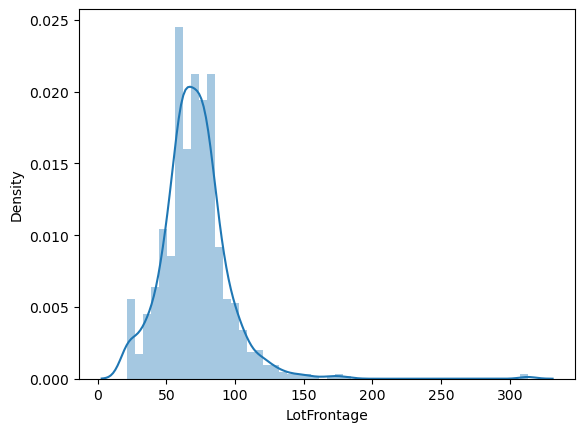

In [13]:
sns.distplot(rental['LotFrontage'])
plt.show()

In [14]:
# Replacing the NA values in lot frontage with median
median_value = rental['LotFrontage'].median()
rental['LotFrontage'].fillna(median_value, inplace=True)

In [15]:
rental['MasVnrType'].fillna('None', inplace=True)

<Axes: xlabel='MasVnrArea', ylabel='Density'>

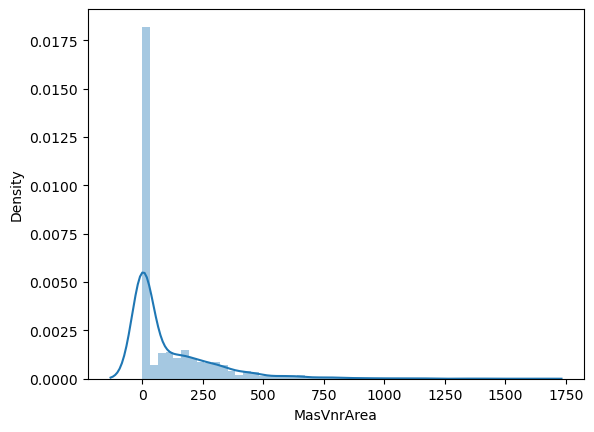

In [16]:
sns.distplot(rental['MasVnrArea'])


## Exploratory Data Analysis on Categorical Variables

In [17]:
rental['MSSubClass'].astype('category').value_counts()

20     507
60     298
50     129
120     87
160     61
80      58
70      57
30      51
90      28
190     21
85      19
75      14
45       9
180      6
40       4
Name: MSSubClass, dtype: int64

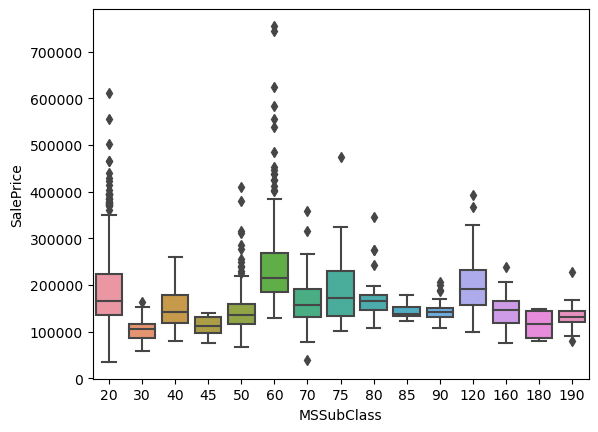

In [18]:
sns.boxplot(x='MSSubClass', y='SalePrice', data=rental)
plt.show()

In [19]:
rental['MSZoning'].astype('category').value_counts()

RL         1074
RM          191
FV           65
RH           11
C (all)       8
Name: MSZoning, dtype: int64

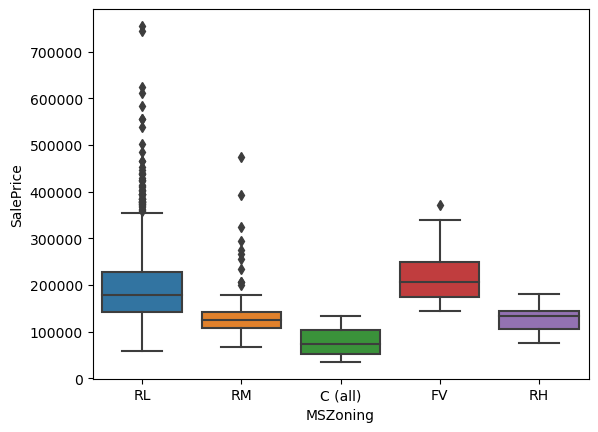

In [20]:
sns.boxplot(x='MSZoning', y='SalePrice', data=rental)
plt.show()

In [21]:
rental['LotShape'].astype('category').value_counts()

Reg    836
IR1    463
IR2     40
IR3     10
Name: LotShape, dtype: int64

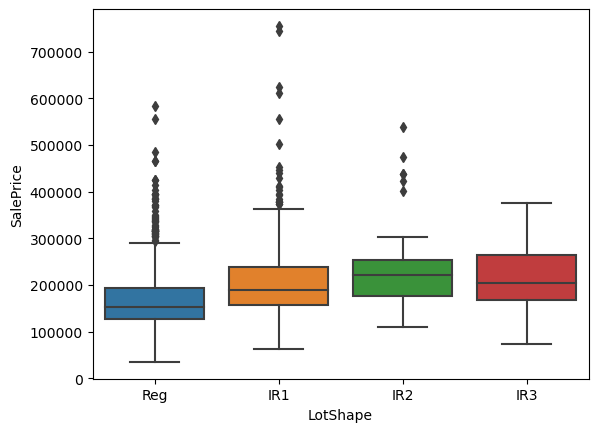

In [22]:
sns.boxplot(x='LotShape', y='SalePrice', data=rental)
plt.show()

In [23]:
rental['LandContour'].astype('category').value_counts()

Lvl    1217
Bnk      52
HLS      48
Low      32
Name: LandContour, dtype: int64

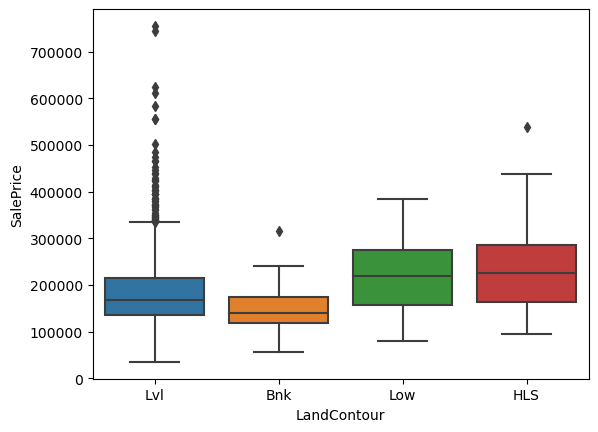

In [24]:
sns.boxplot(x='LandContour', y='SalePrice', data=rental)
plt.show()

In [25]:
rental['LotConfig'].astype('category').value_counts()

Inside     966
Corner     245
CulDSac     91
FR2         43
FR3          4
Name: LotConfig, dtype: int64

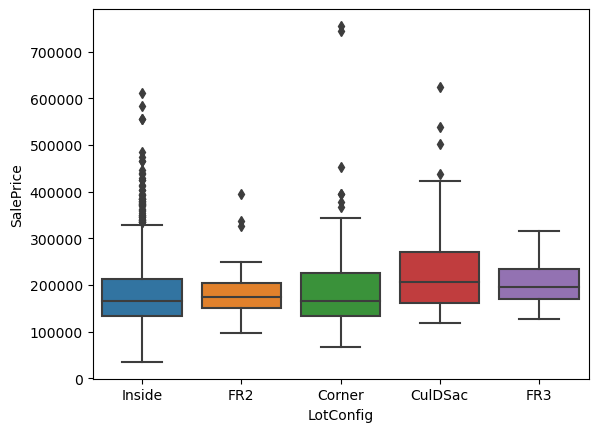

In [26]:
sns.boxplot(x='LotConfig', y='SalePrice', data=rental)
plt.show()

In [27]:
rental['LandSlope'].astype('category').value_counts()

Gtl    1276
Mod      61
Sev      12
Name: LandSlope, dtype: int64

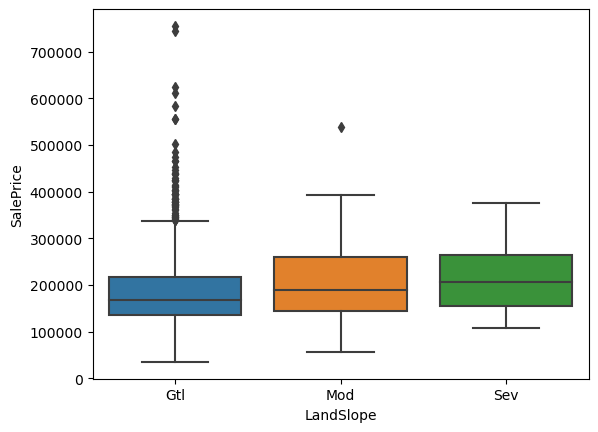

In [28]:
sns.boxplot(x='LandSlope', y='SalePrice', data=rental)
plt.show()

In [29]:
rental['Neighborhood'].astype('category').value_counts()

NAmes      209
CollgCr    148
OldTown    100
Somerst     86
Gilbert     78
NridgHt     77
NWAmes      73
Edwards     70
Sawyer      69
SawyerW     54
Crawfor     51
BrkSide     47
Mitchel     42
NoRidge     41
Timber      38
IDOTRR      29
ClearCr     26
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
MeadowV     12
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

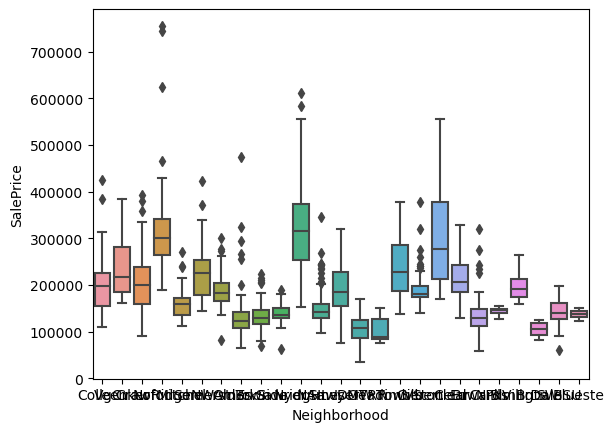

In [30]:
sns.boxplot(x='Neighborhood', y='SalePrice', data=rental)
plt.show()

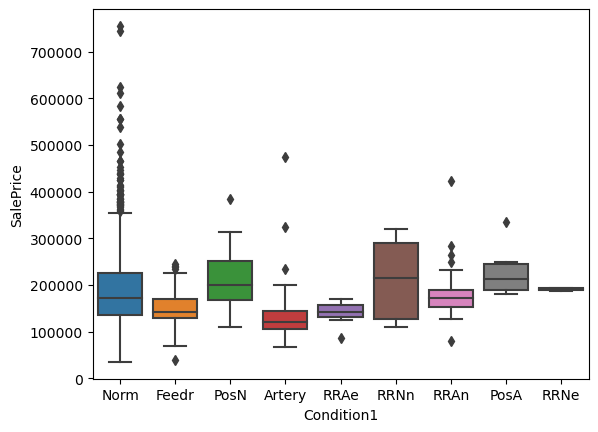

In [31]:
sns.boxplot(x='Condition1', y='SalePrice', data=rental)
plt.show()

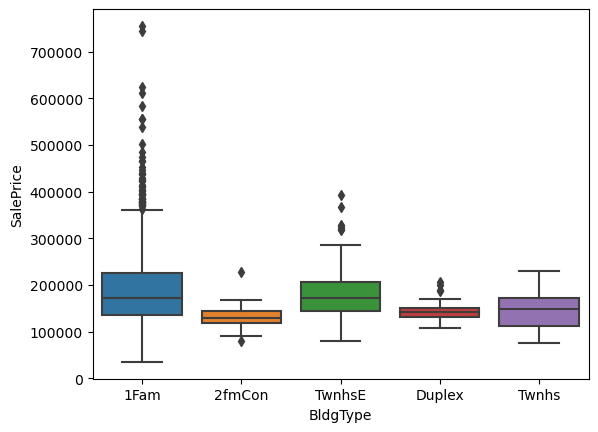

In [32]:
sns.boxplot(x='BldgType', y='SalePrice', data=rental)
plt.show()

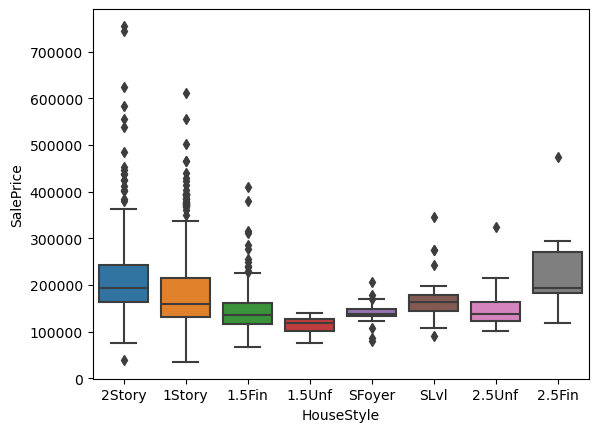

In [33]:
sns.boxplot(x='HouseStyle', y='SalePrice', data=rental)
plt.show()

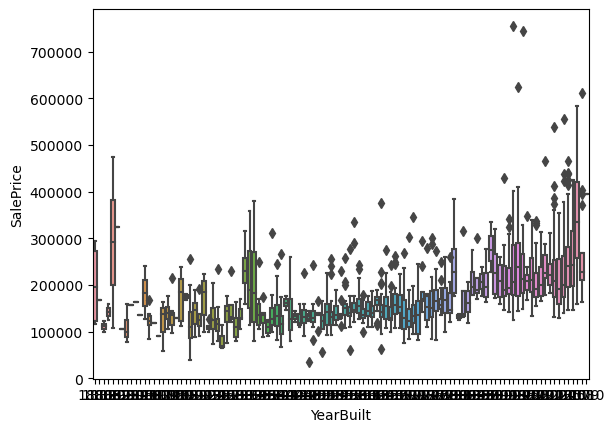

In [34]:
sns.boxplot(x='YearBuilt', y='SalePrice', data=rental)
plt.show()

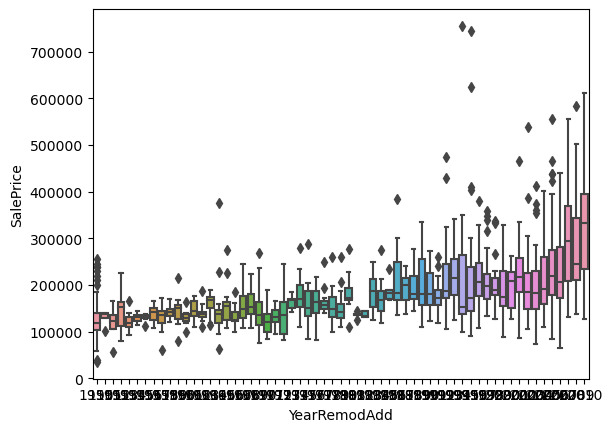

In [35]:
sns.boxplot(x='YearRemodAdd', y='SalePrice', data=rental)
plt.show()

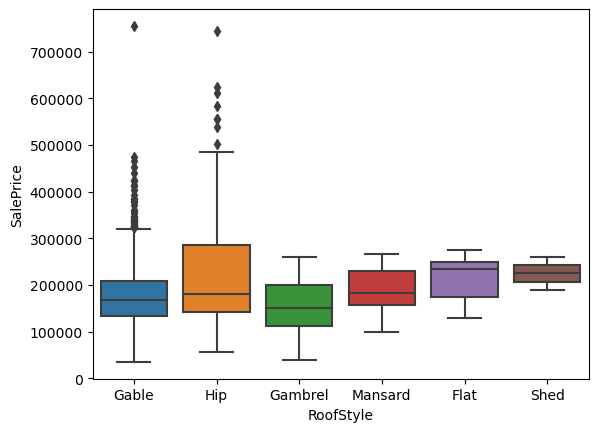

In [36]:
sns.boxplot(x='RoofStyle', y='SalePrice', data=rental)
plt.show()

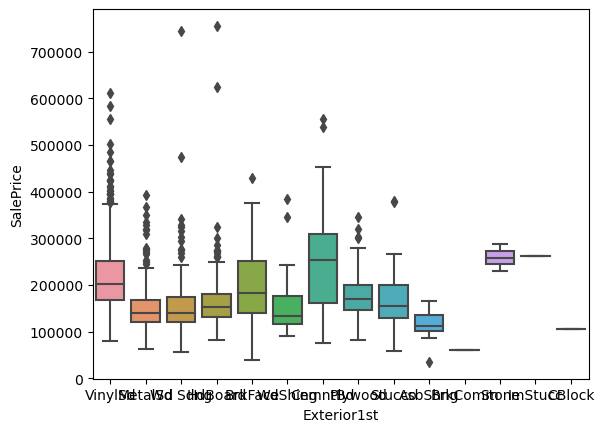

In [37]:
sns.boxplot(x='Exterior1st', y='SalePrice', data=rental)
plt.show()

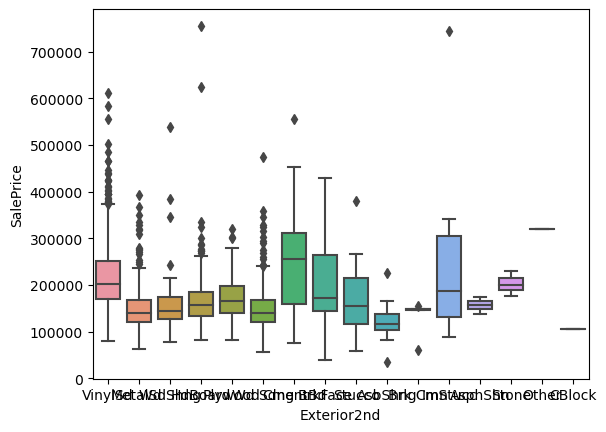

In [38]:
sns.boxplot(x='Exterior2nd', y='SalePrice', data=rental)
plt.show()

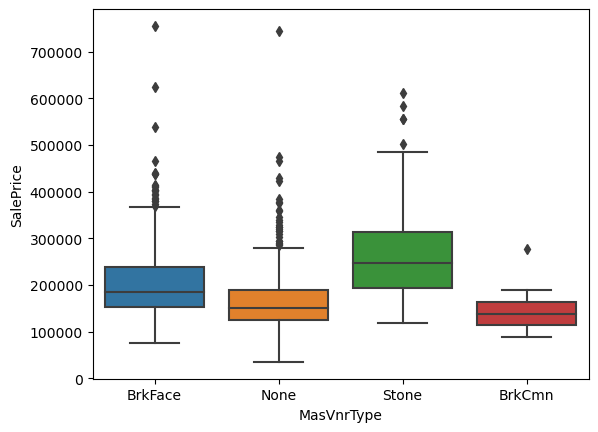

In [39]:
sns.boxplot(x='MasVnrType', y='SalePrice', data=rental)
plt.show()

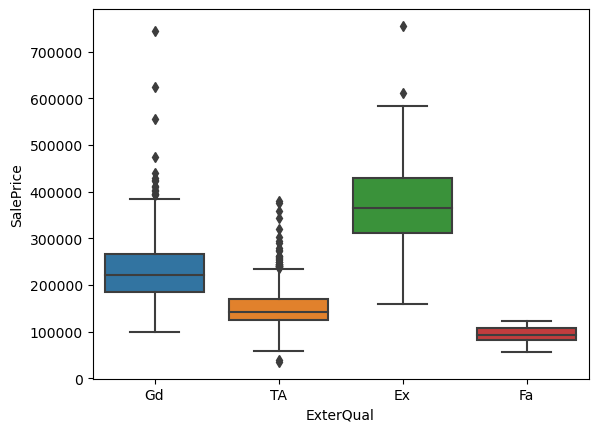

In [40]:
sns.boxplot(x='ExterQual', y='SalePrice', data=rental)
plt.show()

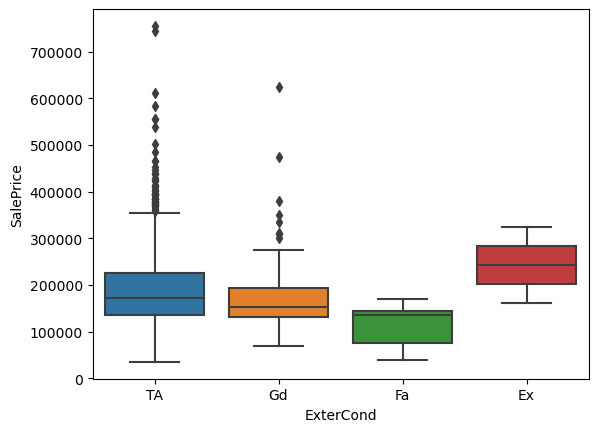

In [41]:
sns.boxplot(x='ExterCond', y='SalePrice', data=rental)
plt.show()

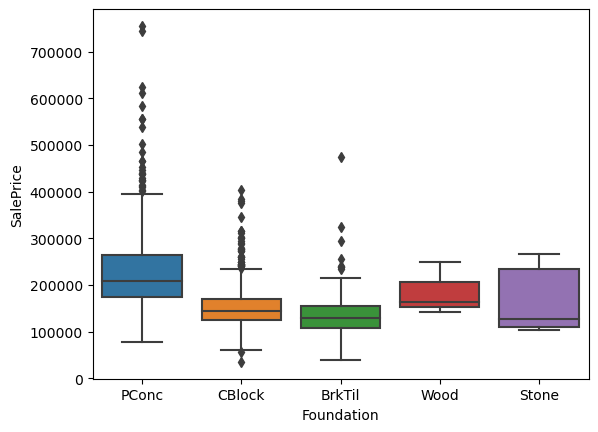

In [42]:
sns.boxplot(x='Foundation', y='SalePrice', data=rental)
plt.show()

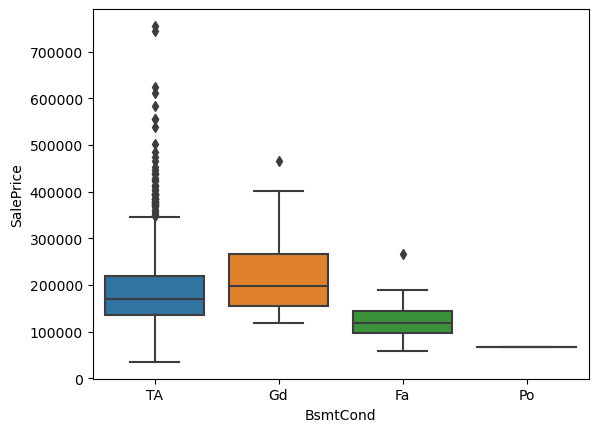

In [43]:
sns.boxplot(x='BsmtCond', y='SalePrice', data=rental)
plt.show()

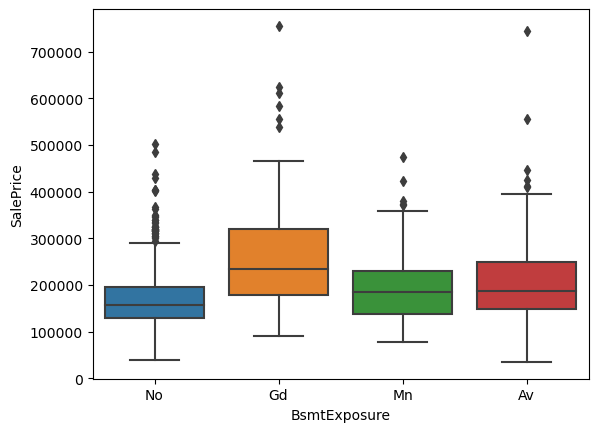

In [44]:
sns.boxplot(x='BsmtExposure', y='SalePrice', data=rental)
plt.show()

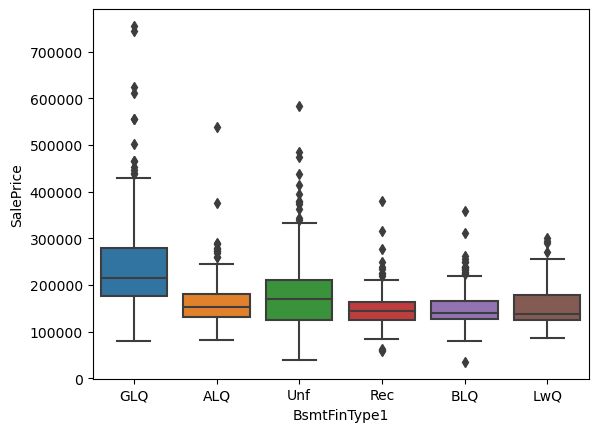

In [45]:
sns.boxplot(x='BsmtFinType1', y='SalePrice', data=rental)
plt.show()

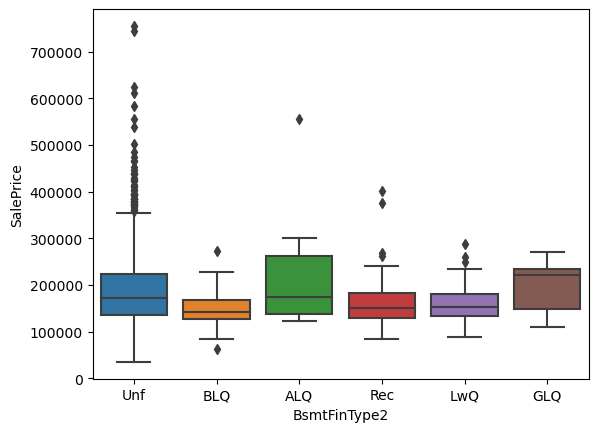

In [46]:
sns.boxplot(x='BsmtFinType2', y='SalePrice', data=rental)
plt.show()

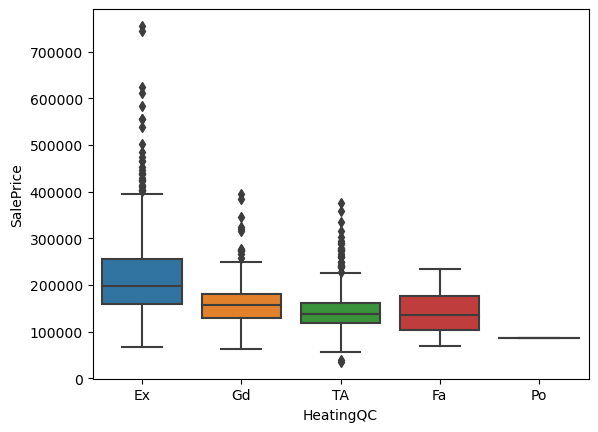

In [47]:
sns.boxplot(x='HeatingQC', y='SalePrice', data=rental)
plt.show()

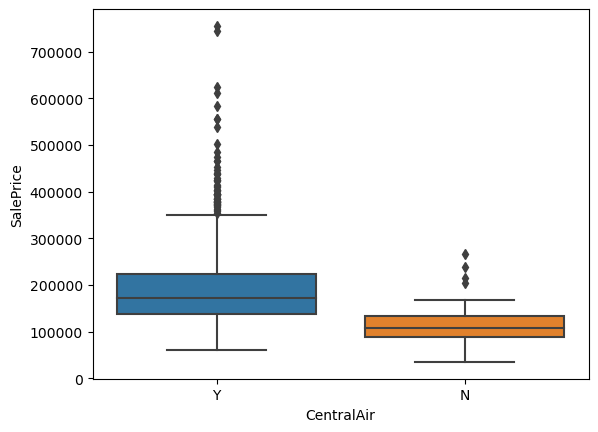

In [48]:
sns.boxplot(x='CentralAir', y='SalePrice', data=rental)
plt.show()

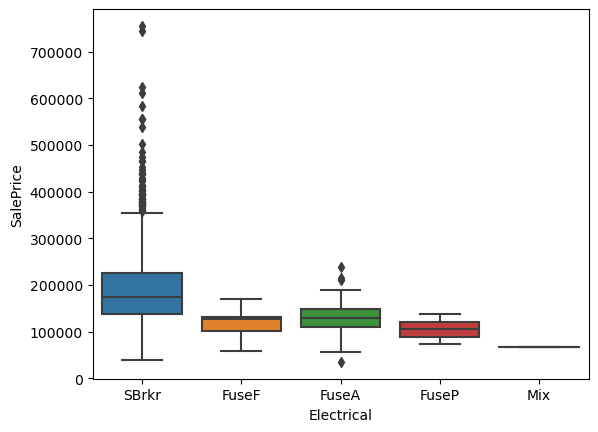

In [49]:
sns.boxplot(x='Electrical', y='SalePrice', data=rental)
plt.show()

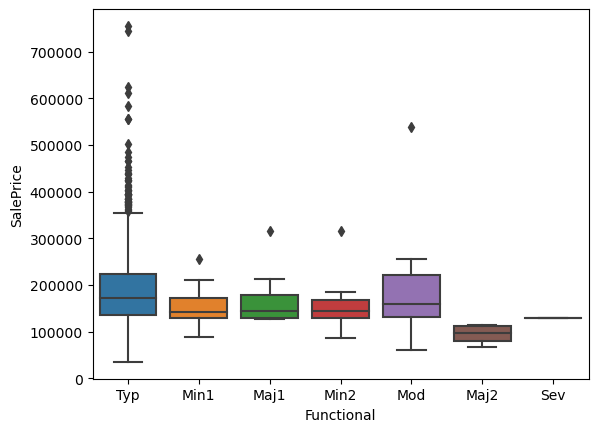

In [50]:
sns.boxplot(x='Functional', y='SalePrice', data=rental)
plt.show()

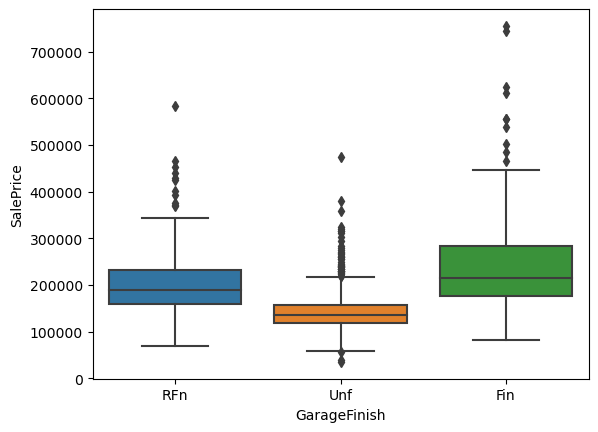

In [51]:
sns.boxplot(x='GarageFinish', y='SalePrice', data=rental)
plt.show()

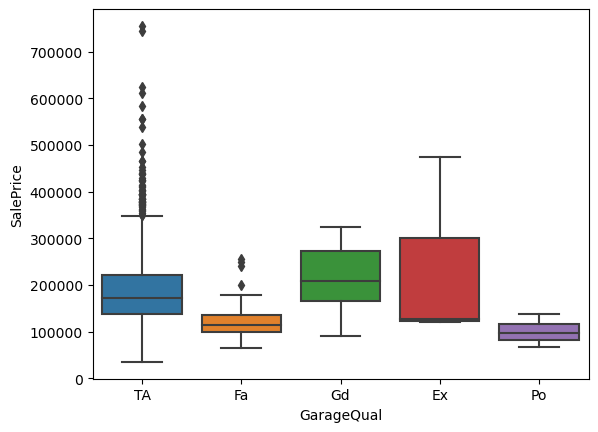

In [52]:
sns.boxplot(x='GarageQual', y='SalePrice', data=rental)
plt.show()

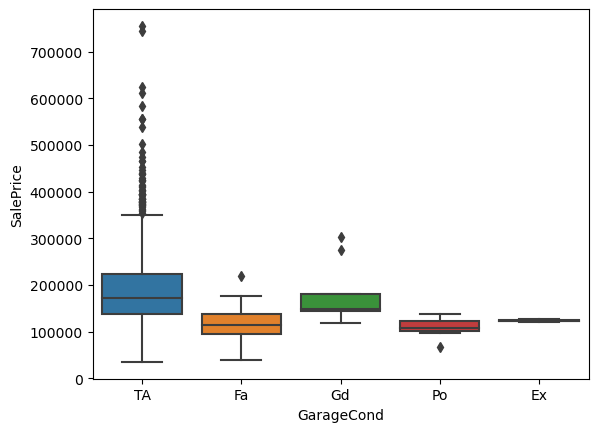

In [53]:
sns.boxplot(x='GarageCond', y='SalePrice', data=rental)
plt.show()

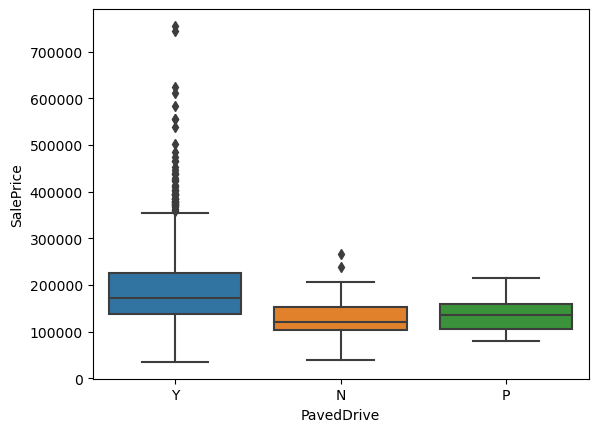

In [54]:
sns.boxplot(x='PavedDrive', y='SalePrice', data=rental)
plt.show()

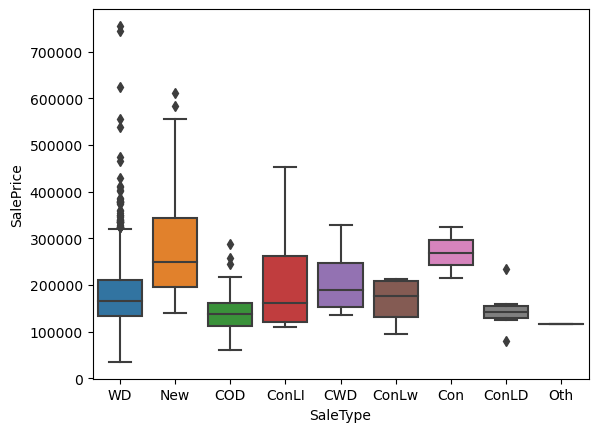

In [55]:
sns.boxplot(x='SaleType', y='SalePrice', data=rental)
plt.show()

In [56]:
rental.drop(columns=['LandContour', 'LotConfig', 'LandSlope', 'BsmtFinType1', 'BsmtFinType2','Electrical',
                    'Functional','GarageYrBlt','PavedDrive'], inplace=True)

In [57]:
# Replacing the NA values in MasVnrArea with median
rental['MasVnrArea'].fillna(0, inplace=True)

In [58]:
rental['BsmtExposure'].astype('category').value_counts()



No    896
Av    213
Gd    128
Mn    111
Name: BsmtExposure, dtype: int64

In [59]:
#Filling NA row with median "No"
rental['BsmtExposure'].fillna('No', inplace=True)

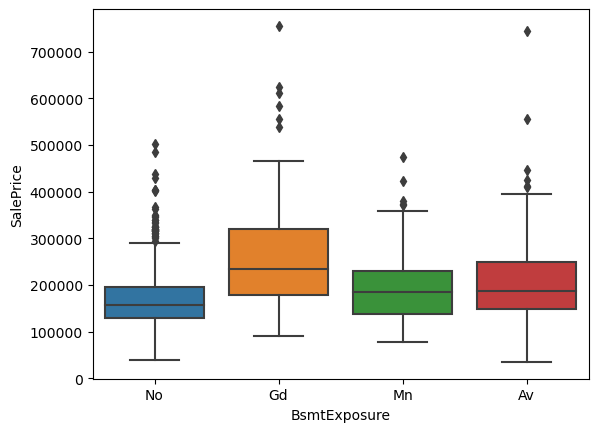

In [60]:
sns.boxplot(x='BsmtExposure', y='SalePrice', data=rental)
plt.show()

In [61]:
rental['MSSubClass'].astype('category').value_counts()

20     507
60     298
50     129
120     87
160     61
80      58
70      57
30      51
90      28
190     21
85      19
75      14
45       9
180      6
40       4
Name: MSSubClass, dtype: int64

In [62]:
rental['MSZoning'].astype('category').value_counts()

RL         1074
RM          191
FV           65
RH           11
C (all)       8
Name: MSZoning, dtype: int64

In [63]:
rental['Street'].astype('category').value_counts()
#We might not consider Street as only 5 have gravel vs 1344 as pave

Pave    1344
Grvl       5
Name: Street, dtype: int64

In [64]:
rental['LotShape'].astype('category').value_counts()

Reg    836
IR1    463
IR2     40
IR3     10
Name: LotShape, dtype: int64

In [65]:
rental['Utilities'].astype('category').value_counts()
#ignmore

AllPub    1348
NoSeWa       1
Name: Utilities, dtype: int64

In [66]:
rental['Neighborhood'].astype('category').value_counts()

NAmes      209
CollgCr    148
OldTown    100
Somerst     86
Gilbert     78
NridgHt     77
NWAmes      73
Edwards     70
Sawyer      69
SawyerW     54
Crawfor     51
BrkSide     47
Mitchel     42
NoRidge     41
Timber      38
IDOTRR      29
ClearCr     26
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
MeadowV     12
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [67]:
rental['Condition1'].astype('category').value_counts()

Norm      1173
Feedr       63
Artery      43
RRAn        26
PosN        19
RRAe        10
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

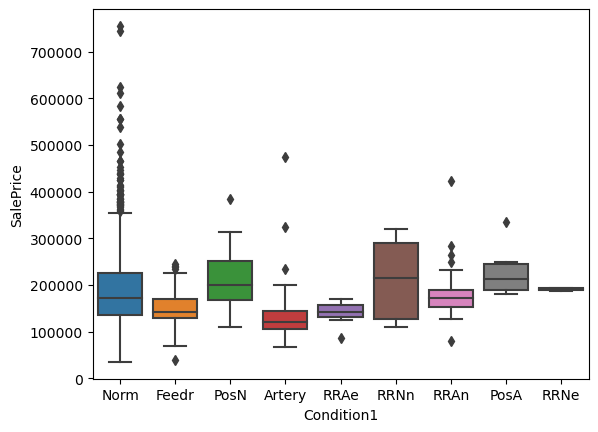

In [68]:
sns.boxplot(x='Condition1', y='SalePrice', data=rental)
plt.show()

In [69]:
rental['Condition2'].astype('category').value_counts()
#ignore as almost all are Norm

Norm      1335
Feedr        5
Artery       2
PosN         2
RRNn         2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

In [70]:
rental['BldgType'].astype('category').value_counts()

1Fam      1148
TwnhsE     113
Twnhs       38
Duplex      28
2fmCon      22
Name: BldgType, dtype: int64

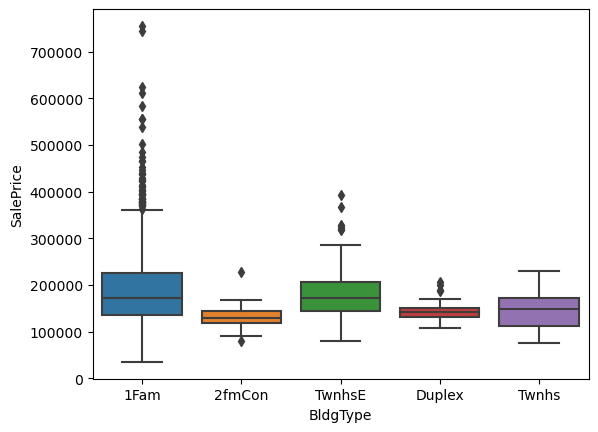

In [71]:
sns.boxplot(x='BldgType', y='SalePrice', data=rental)
plt.show()

In [72]:
rental['HouseStyle'].astype('category').value_counts()

1Story    663
2Story    430
1.5Fin    134
SLvl       65
SFoyer     30
1.5Unf     11
2.5Unf     10
2.5Fin      6
Name: HouseStyle, dtype: int64

In [73]:
rental['RoofStyle'].astype('category').value_counts()

Gable      1047
Hip         273
Flat         11
Gambrel      10
Mansard       6
Shed          2
Name: RoofStyle, dtype: int64

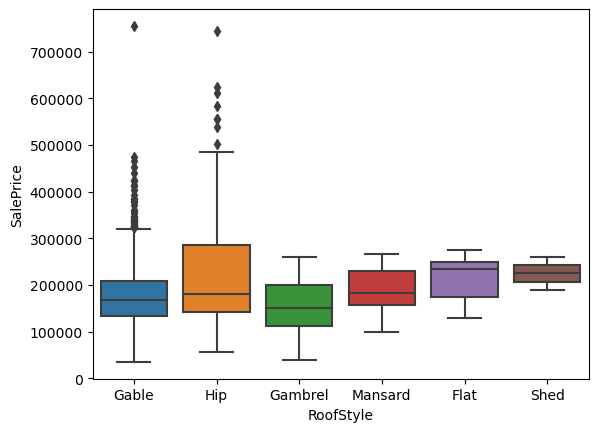

In [74]:
sns.boxplot(x='RoofStyle', y='SalePrice', data=rental)
plt.show()

In [75]:
rental['RoofMatl'].astype('category').value_counts()
#ignore as almost all are Norm

CompShg    1325
Tar&Grv       9
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

In [76]:
rental['Exterior1st'].astype('category').value_counts()

VinylSd    494
HdBoard    211
MetalSd    201
Wd Sdng    184
Plywood    100
CemntBd     54
BrkFace     44
Stucco      21
WdShing     20
AsbShng     15
Stone        2
BrkComm      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

In [77]:
rental['Exterior2nd'].astype('category').value_counts()

VinylSd    483
HdBoard    197
MetalSd    197
Wd Sdng    176
Plywood    127
CmentBd     53
Wd Shng     32
Stucco      23
BrkFace     22
AsbShng     16
ImStucc     10
Brk Cmn      6
Stone        3
AsphShn      2
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [78]:
rental['MasVnrType'].astype('category').value_counts()

None       772
BrkFace    434
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

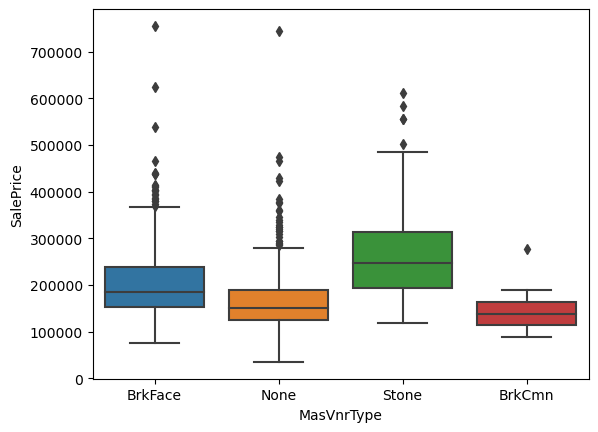

In [79]:
sns.boxplot(x='MasVnrType', y='SalePrice', data=rental)
plt.show()

In [80]:
rental['ExterQual'].astype('category').value_counts()

TA    804
Gd    486
Ex     52
Fa      7
Name: ExterQual, dtype: int64

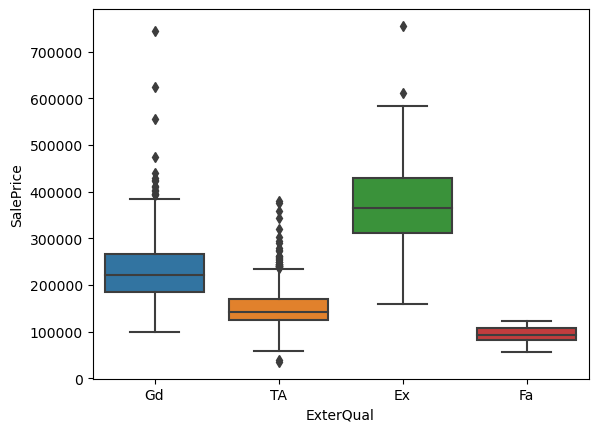

In [81]:
sns.boxplot(x='ExterQual', y='SalePrice', data=rental)
plt.show()

In [82]:
rental['ExterCond'].astype('category').value_counts()

TA    1194
Gd     137
Fa      16
Ex       2
Name: ExterCond, dtype: int64

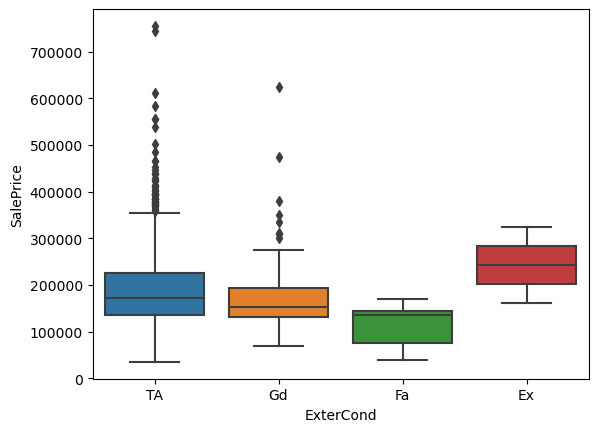

In [83]:
sns.boxplot(x='ExterCond', y='SalePrice', data=rental)
plt.show()

In [84]:
rental['Foundation'].astype('category').value_counts()

PConc     631
CBlock    580
BrkTil    129
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [85]:
rental['BsmtQual'].astype('category').value_counts()

Gd    601
TA    595
Ex    121
Fa     32
Name: BsmtQual, dtype: int64

In [86]:
rental['BsmtCond'].astype('category').value_counts()

TA    1247
Gd      63
Fa      38
Po       1
Name: BsmtCond, dtype: int64

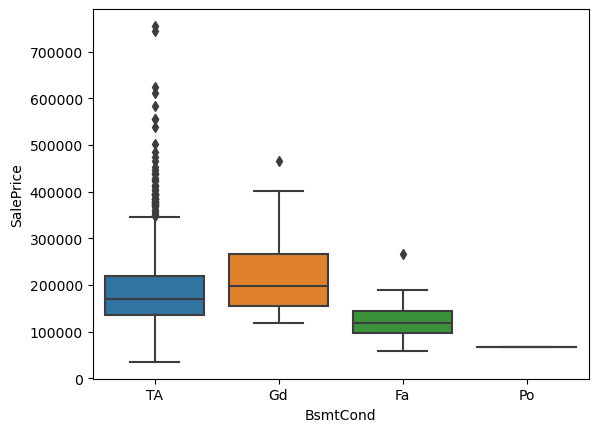

In [87]:
sns.boxplot(x='BsmtCond', y='SalePrice', data=rental)
plt.show()

In [88]:
rental['BsmtExposure'].astype('category').value_counts()

No    897
Av    213
Gd    128
Mn    111
Name: BsmtExposure, dtype: int64

In [89]:
rental['Heating'].astype('category').value_counts()
#ignore as almost all are GasA

GasA    1329
GasW      16
Grav       3
OthW       1
Name: Heating, dtype: int64

In [90]:
rental['HeatingQC'].astype('category').value_counts()

Ex    713
TA    381
Gd    218
Fa     36
Po      1
Name: HeatingQC, dtype: int64

In [91]:
rental['CentralAir'].astype('category').value_counts()

Y    1288
N      61
Name: CentralAir, dtype: int64

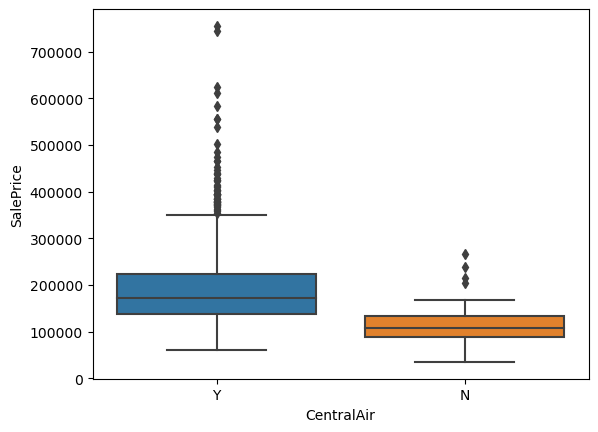

In [92]:
sns.boxplot(x='CentralAir', y='SalePrice', data=rental)
plt.show()

In [93]:
rental['KitchenQual'].astype('category').value_counts()

TA    651
Gd    577
Ex     98
Fa     23
Name: KitchenQual, dtype: int64

In [94]:
rental['GarageType'].astype('category').value_counts()

Attchd     861
Detchd     369
BuiltIn     87
Basment     19
CarPort      7
2Types       6
Name: GarageType, dtype: int64

In [95]:
rental['GarageFinish'].astype('category').value_counts()

Unf    580
RFn    419
Fin    350
Name: GarageFinish, dtype: int64

In [96]:
rental['GarageQual'].astype('category').value_counts()

TA    1281
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

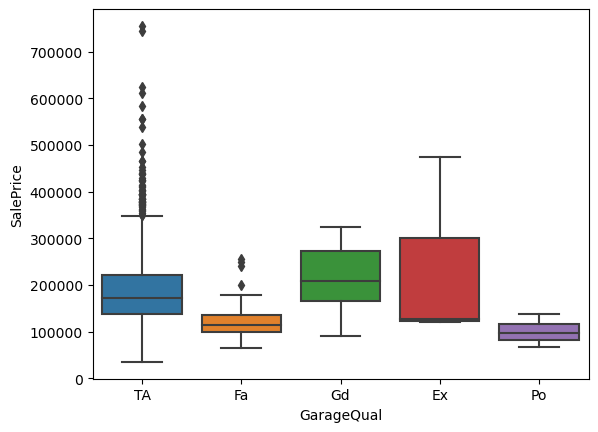

In [97]:
sns.boxplot(x='GarageQual', y='SalePrice', data=rental)
plt.show()

In [98]:
rental['GarageCond'].astype('category').value_counts()

TA    1298
Fa      33
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

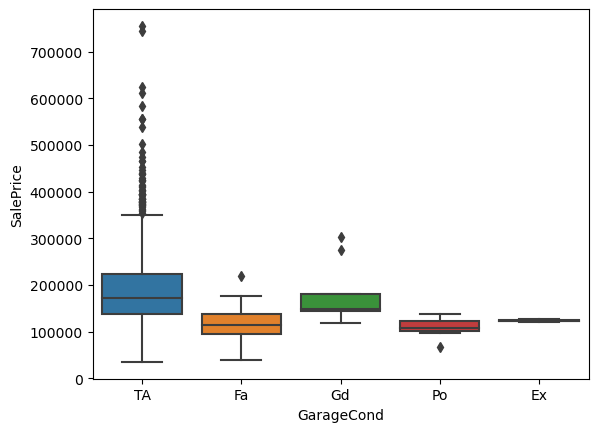

In [99]:
sns.boxplot(x='GarageCond', y='SalePrice', data=rental)
plt.show()

In [100]:
rental['SaleType'].astype('category').value_counts()

WD       1166
New       120
COD        42
ConLD       6
CWD         4
ConLI       4
ConLw       4
Con         2
Oth         1
Name: SaleType, dtype: int64

In [101]:
rental['SaleCondition'].astype('category').value_counts()

Normal     1111
Partial     123
Abnorml      86
Family       20
Alloca        8
AdjLand       1
Name: SaleCondition, dtype: int64

In [102]:
rental['YrSold'].astype('category').value_counts()

2009    310
2007    308
2006    293
2008    277
2010    161
Name: YrSold, dtype: int64

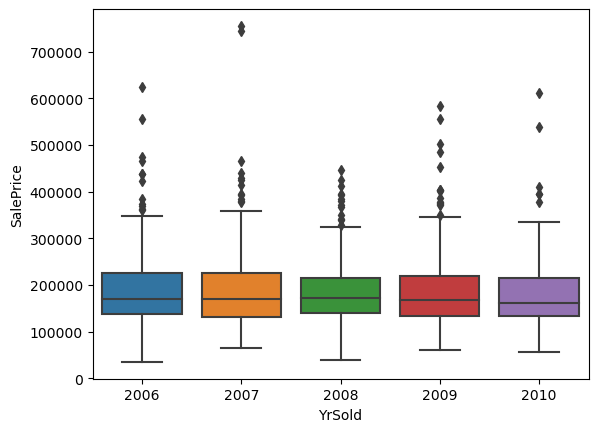

In [103]:
sns.boxplot(x='YrSold', y='SalePrice', data=rental)
plt.show()

In [104]:
rental.drop(columns=['Heating', 'RoofMatl', 'Condition2', 'Utilities', 'Street'], inplace=True)

In [105]:
print(rental.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1349 non-null   int64  
 1   MSSubClass     1349 non-null   int64  
 2   MSZoning       1349 non-null   object 
 3   LotFrontage    1349 non-null   float64
 4   LotArea        1349 non-null   int64  
 5   LotShape       1349 non-null   object 
 6   Neighborhood   1349 non-null   object 
 7   Condition1     1349 non-null   object 
 8   BldgType       1349 non-null   object 
 9   HouseStyle     1349 non-null   object 
 10  OverallQual    1349 non-null   int64  
 11  OverallCond    1349 non-null   int64  
 12  YearBuilt      1349 non-null   int64  
 13  YearRemodAdd   1349 non-null   int64  
 14  RoofStyle      1349 non-null   object 
 15  Exterior1st    1349 non-null   object 
 16  Exterior2nd    1349 non-null   object 
 17  MasVnrType     1349 non-null   object 
 18  MasVnrAr

# EDA on Numerical Variables

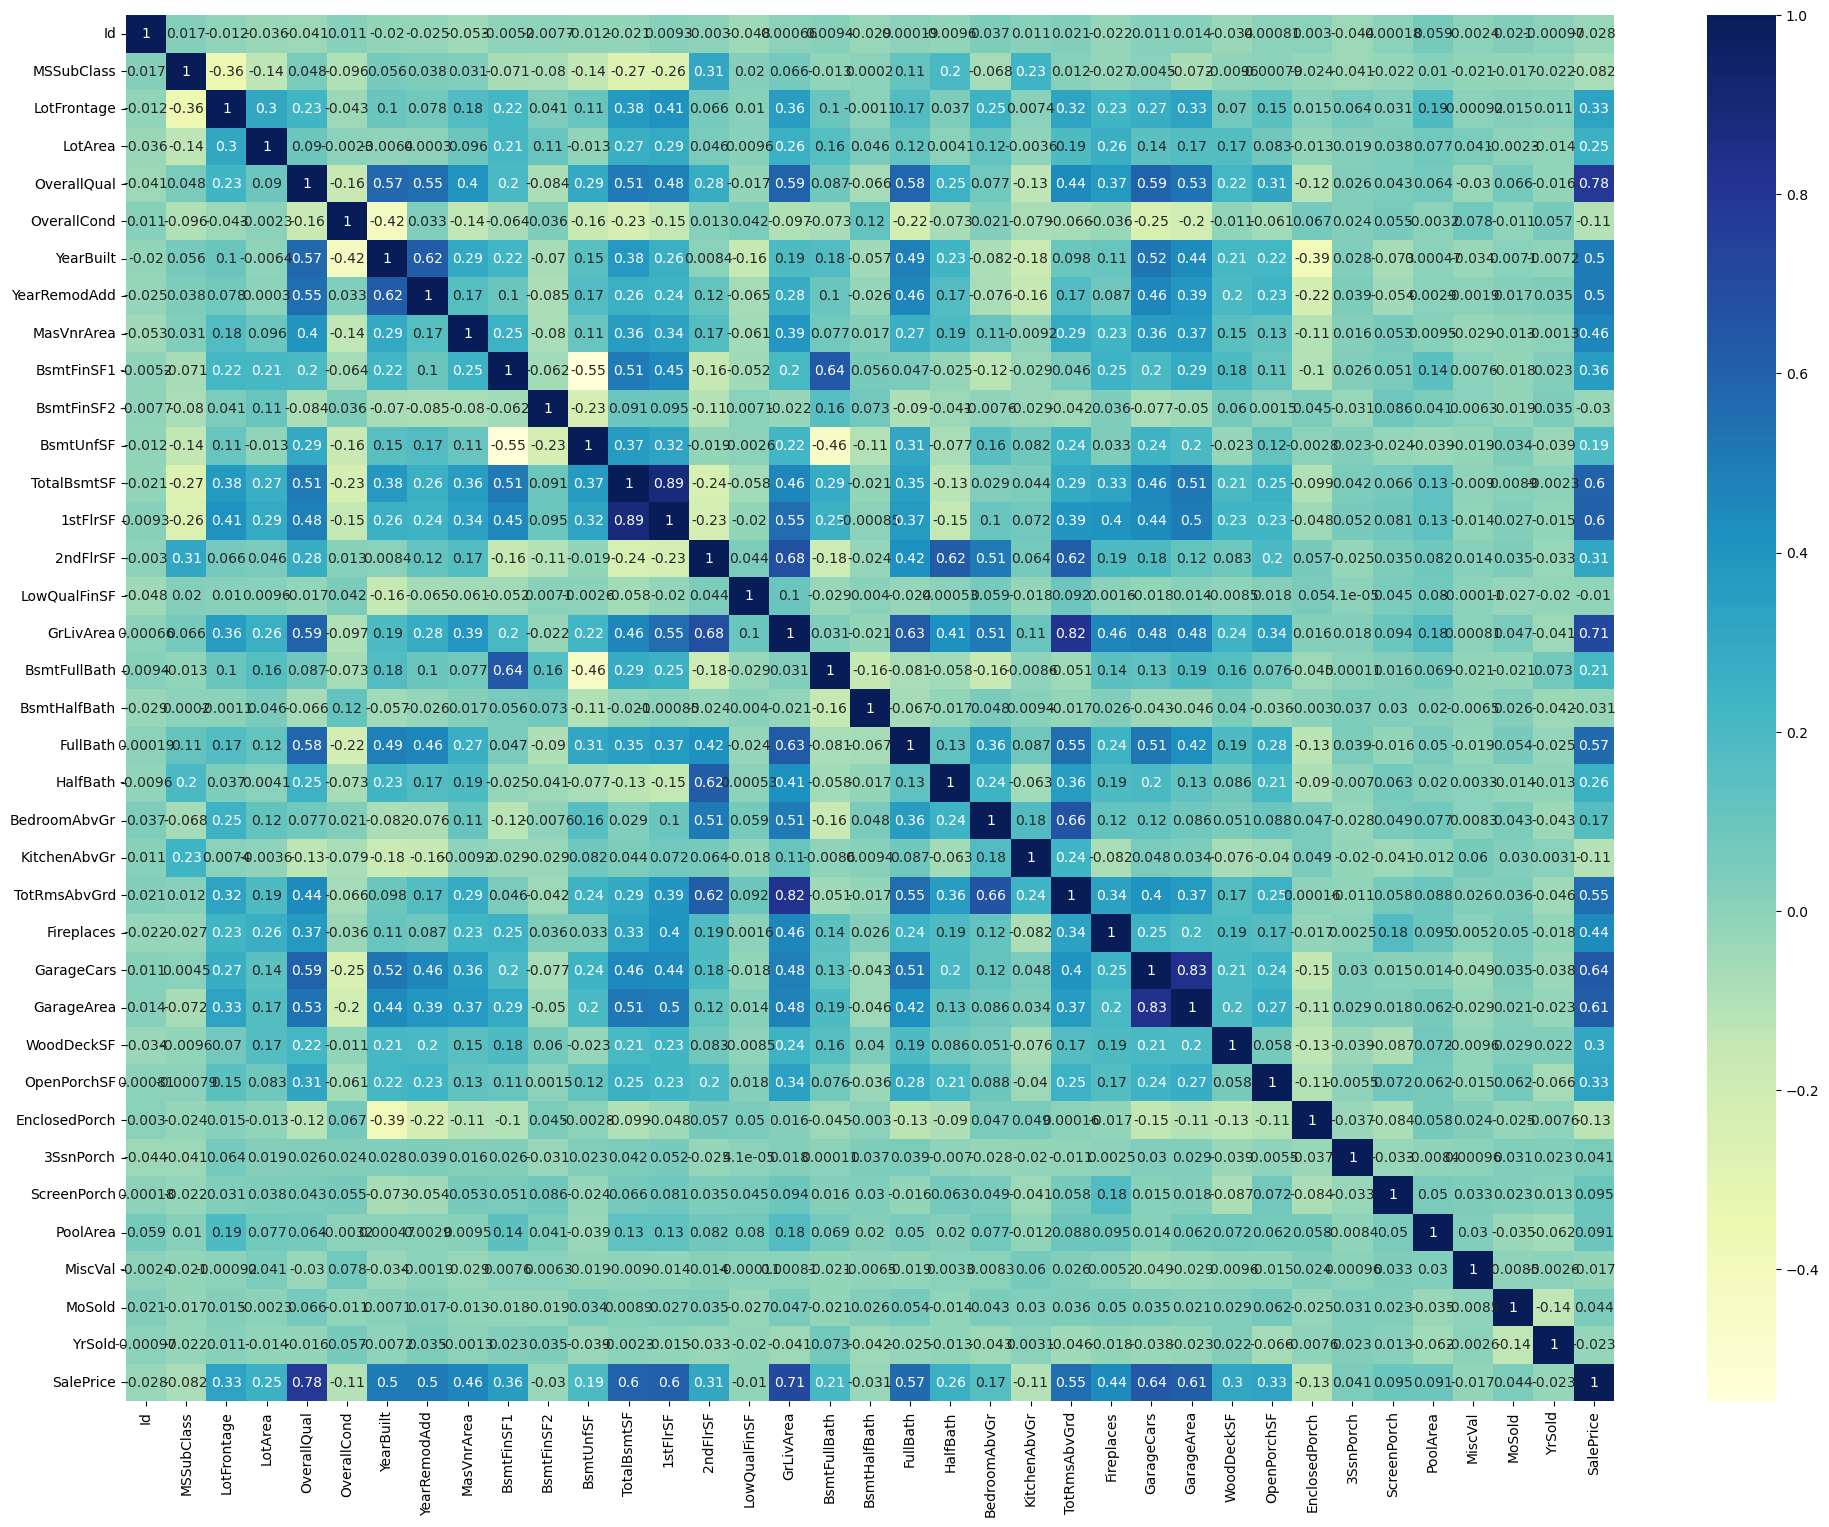

In [106]:
rental_numeric = rental.select_dtypes(include=['float64', 'int64'])

cor = rental_numeric.corr()

# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,18))


# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


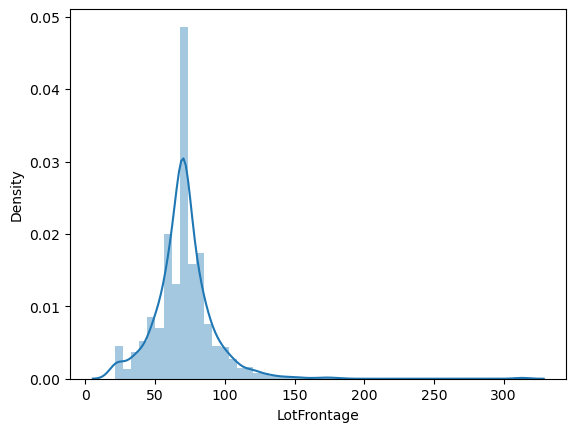

In [107]:
sns.distplot(rental['LotFrontage'])
plt.show()

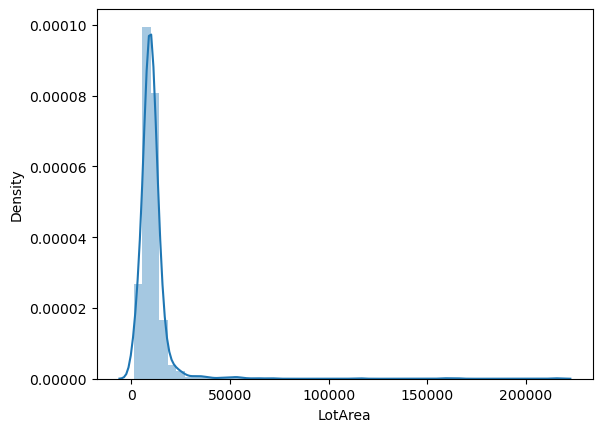

In [108]:
sns.distplot(rental['LotArea'])
plt.show()

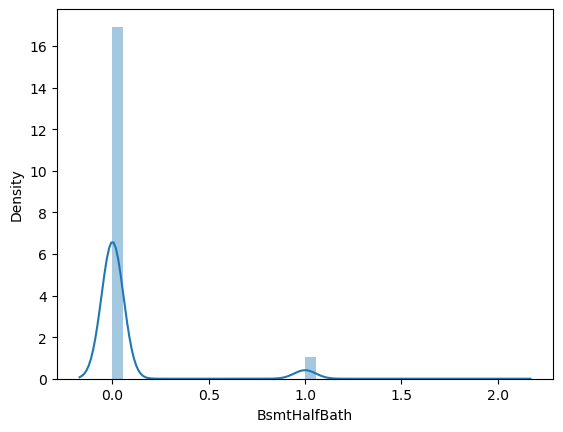

In [109]:
sns.distplot(rental['BsmtHalfBath'])
plt.show()

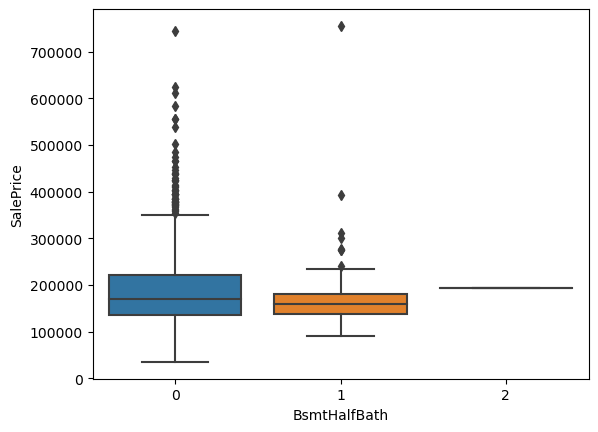

In [110]:
sns.boxplot(x='BsmtHalfBath', y='SalePrice', data=rental)
plt.show()

In [111]:
rental['BsmtHalfBath'].astype('category').value_counts()

0    1269
1      79
2       1
Name: BsmtHalfBath, dtype: int64

In [112]:
rental['BsmtFinSF2'].astype('category').value_counts()

0       1186
180        5
374        3
551        2
290        2
        ... 
215        1
211        1
210        1
208        1
1474       1
Name: BsmtFinSF2, Length: 142, dtype: int64

In [113]:
rental['LowQualFinSF'].astype('category').value_counts()

0      1331
80        3
360       2
120       1
144       1
156       1
232       1
384       1
390       1
392       1
397       1
420       1
473       1
481       1
528       1
572       1
Name: LowQualFinSF, dtype: int64

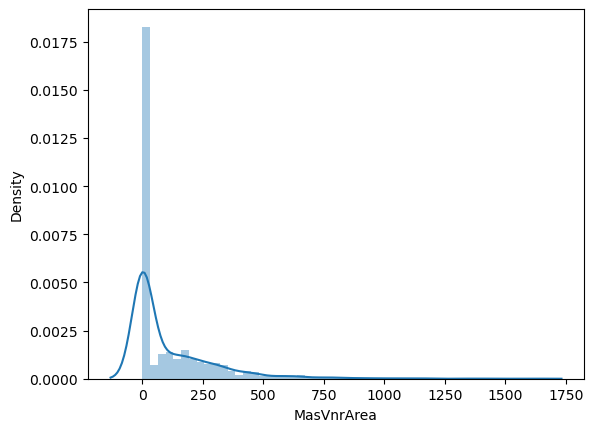

In [114]:
sns.distplot(rental['MasVnrArea'])
plt.show()

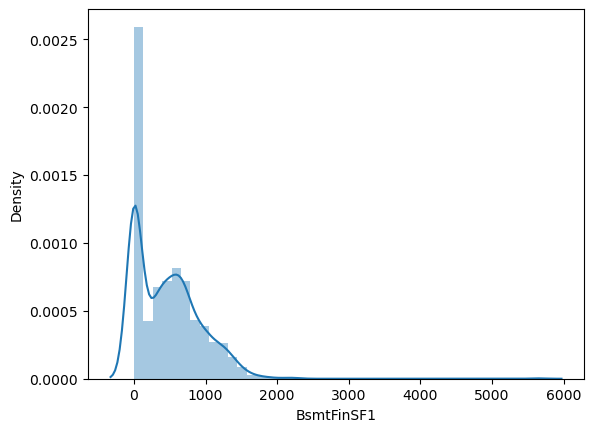

In [115]:
sns.distplot(rental['BsmtFinSF1'])
plt.show()

<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

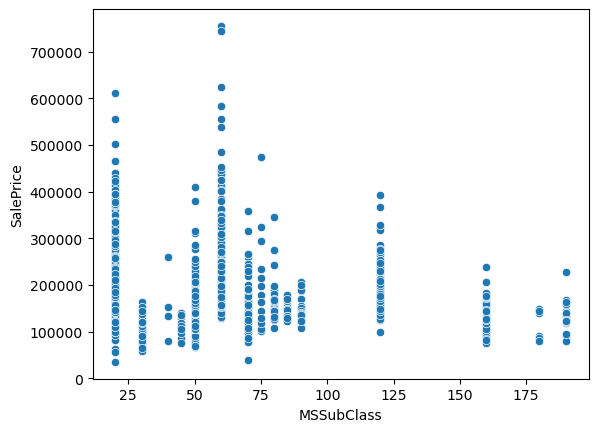

In [116]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'MSSubClass' , y = 'SalePrice')

<Axes: xlabel='LotArea', ylabel='SalePrice'>

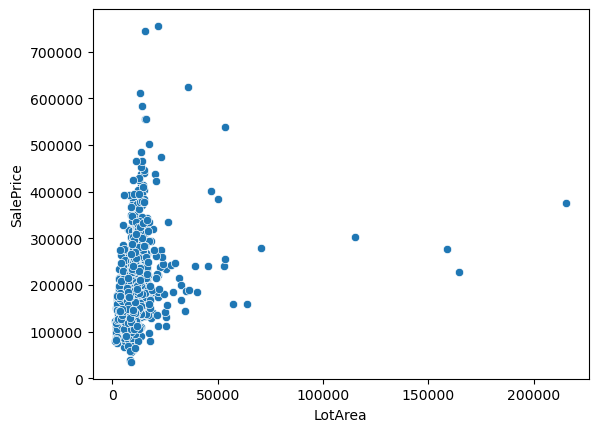

In [117]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'LotArea' , y = 'SalePrice')

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

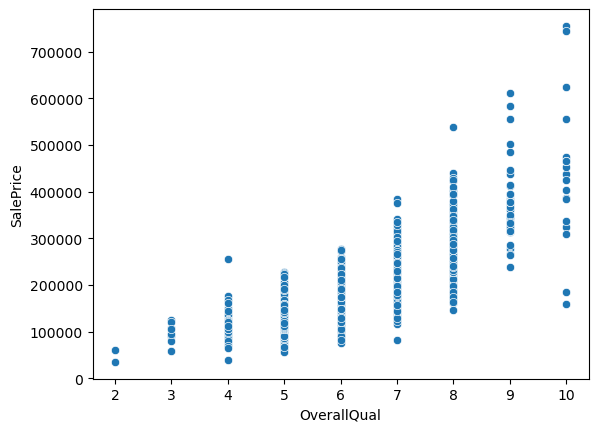

In [118]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'OverallQual' , y = 'SalePrice')

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

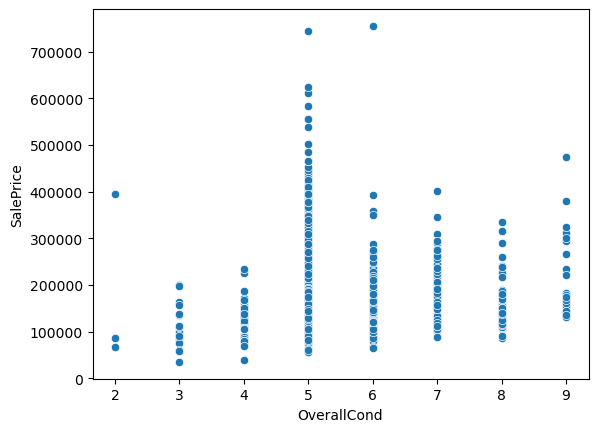

In [119]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'OverallCond' , y = 'SalePrice')

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

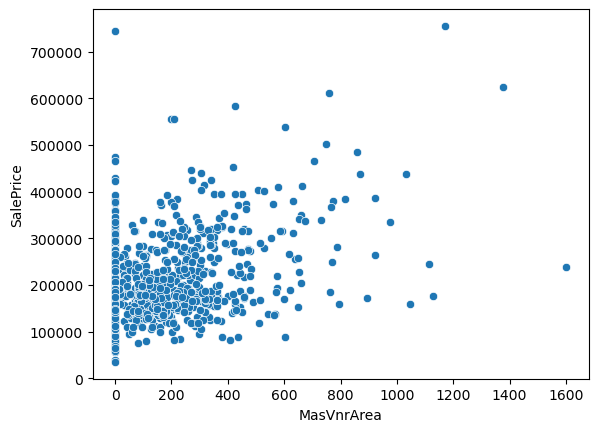

In [120]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'MasVnrArea' , y = 'SalePrice')

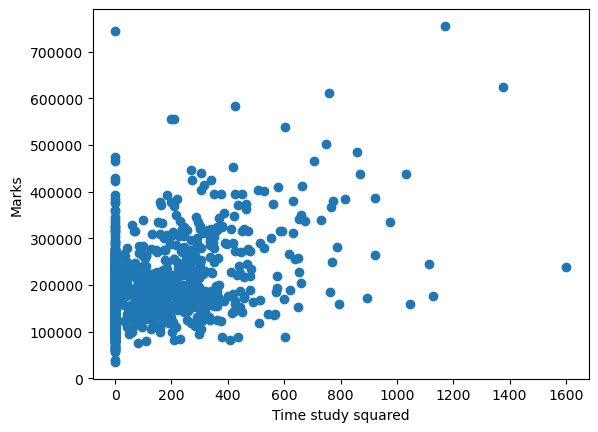

In [121]:
plt.scatter( rental['MasVnrArea'] , rental['SalePrice'])
plt.xlabel("Time study squared")
plt.ylabel("Marks")
plt.show()

In [122]:
# Splitting the dataset into X and y
X = rental[['MasVnrArea' , 'TotalBsmtSF']] 
y = np.array(rental['SalePrice']).reshape(-1,1)

<Axes: xlabel='BsmtFinSF2', ylabel='SalePrice'>

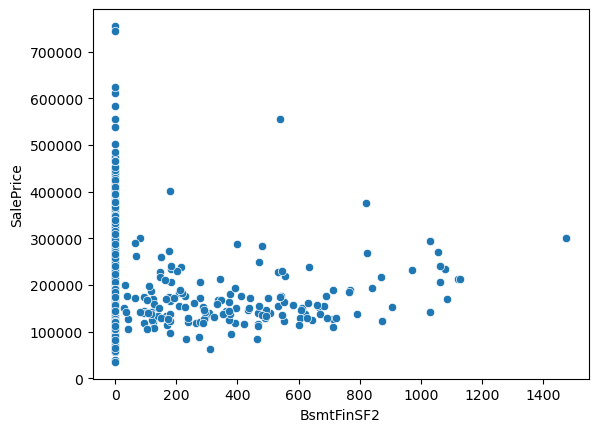

In [123]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'BsmtFinSF2' , y = 'SalePrice')

<Axes: xlabel='BsmtUnfSF', ylabel='SalePrice'>

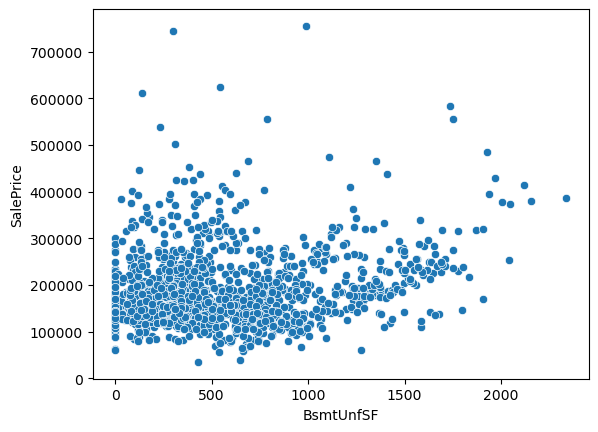

In [124]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'BsmtUnfSF' , y = 'SalePrice')

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

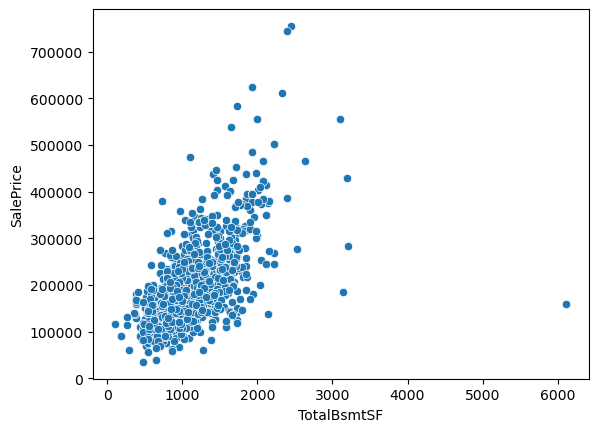

In [125]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'TotalBsmtSF' , y = 'SalePrice')

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

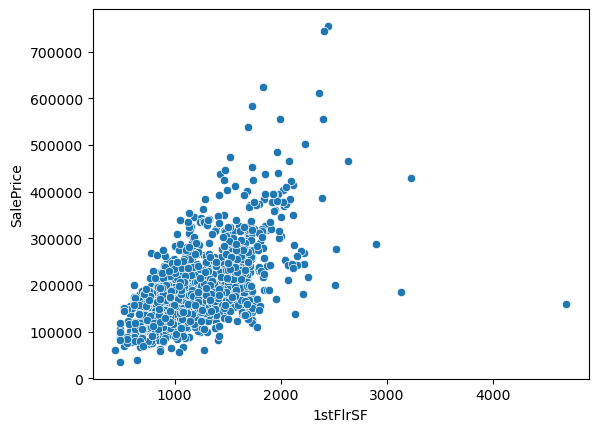

In [126]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = '1stFlrSF' , y = 'SalePrice')

<Axes: xlabel='2ndFlrSF', ylabel='SalePrice'>

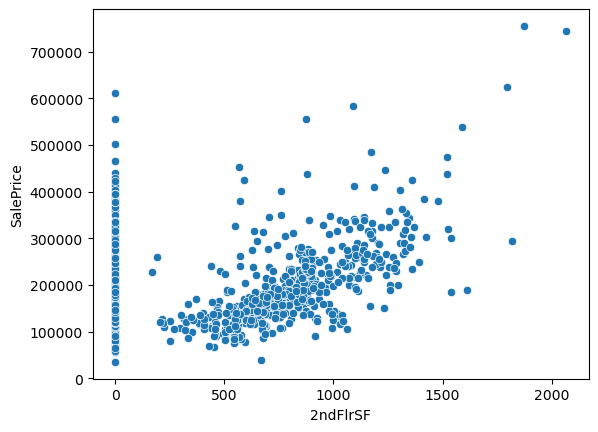

In [127]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = '2ndFlrSF' , y = 'SalePrice')

<Axes: xlabel='LowQualFinSF', ylabel='SalePrice'>

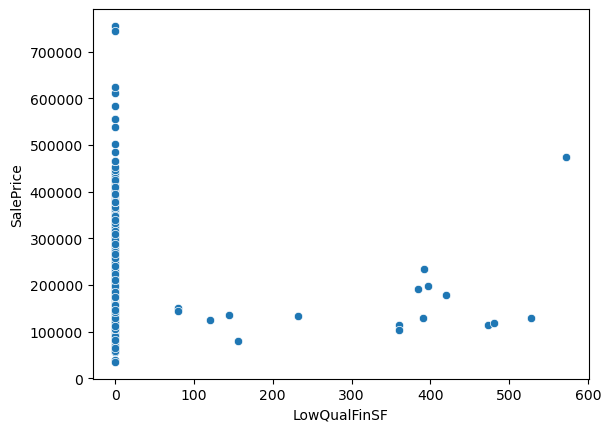

In [128]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'LowQualFinSF' , y = 'SalePrice')

<Axes: xlabel='BsmtFullBath', ylabel='SalePrice'>

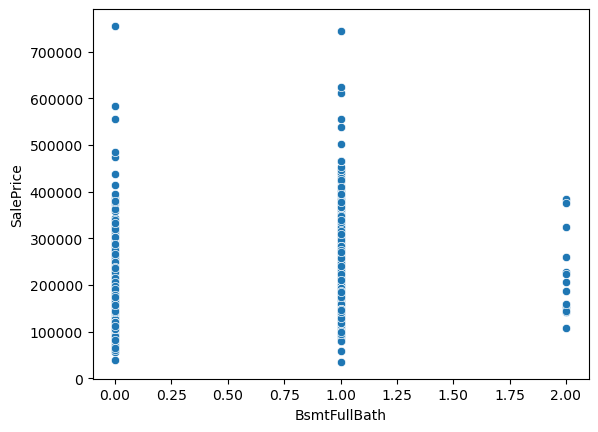

In [129]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'BsmtFullBath' , y = 'SalePrice')

<Axes: xlabel='BsmtHalfBath', ylabel='SalePrice'>

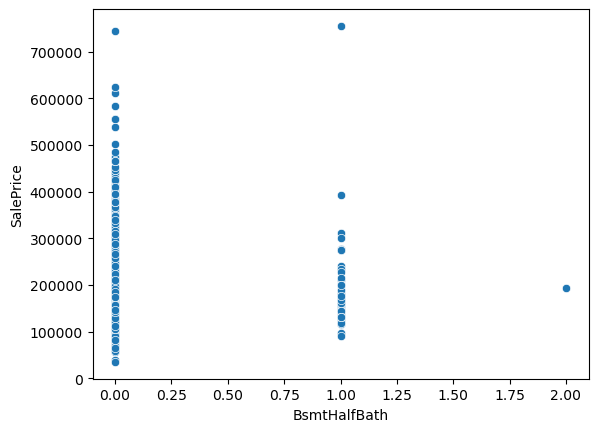

In [130]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'BsmtHalfBath' , y = 'SalePrice')

<Axes: xlabel='FullBath', ylabel='SalePrice'>

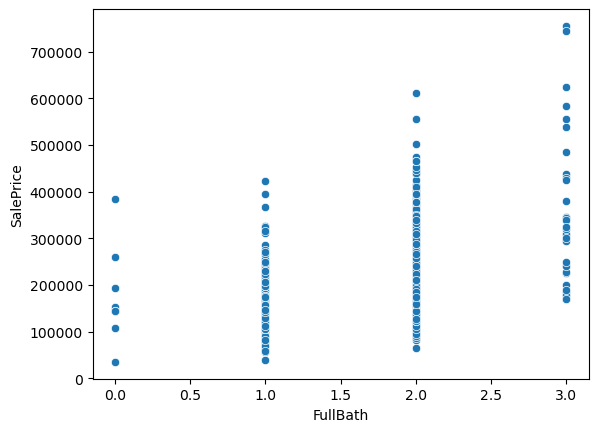

In [131]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'FullBath' , y = 'SalePrice')

<Axes: xlabel='HalfBath', ylabel='SalePrice'>

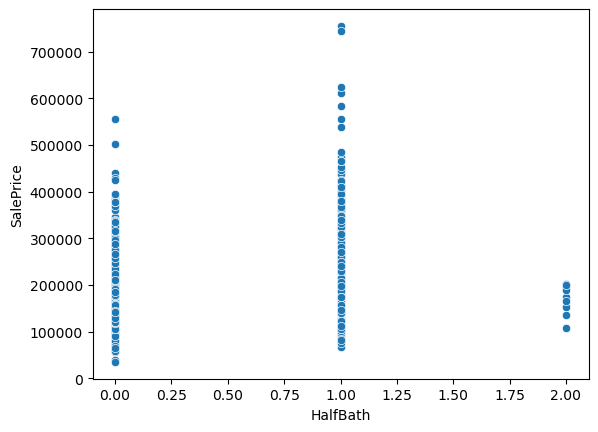

In [132]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'HalfBath' , y = 'SalePrice')

<Axes: xlabel='BedroomAbvGr', ylabel='SalePrice'>

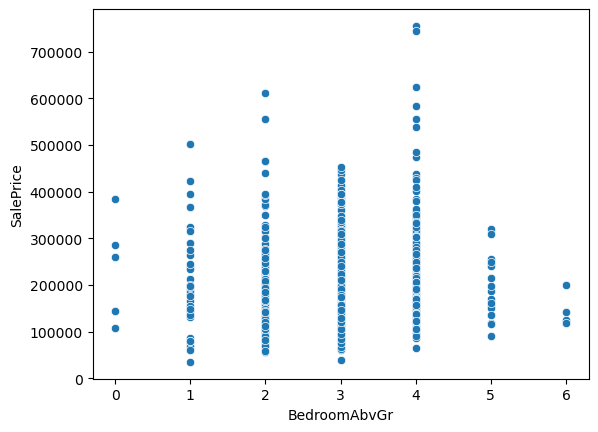

In [133]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'BedroomAbvGr' , y = 'SalePrice')

<Axes: xlabel='KitchenAbvGr', ylabel='SalePrice'>

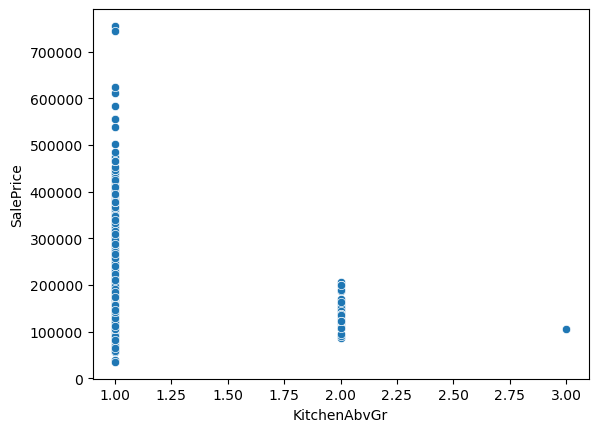

In [134]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'KitchenAbvGr' , y = 'SalePrice')


<Axes: xlabel='KitchenAbvGr', ylabel='SalePrice'>

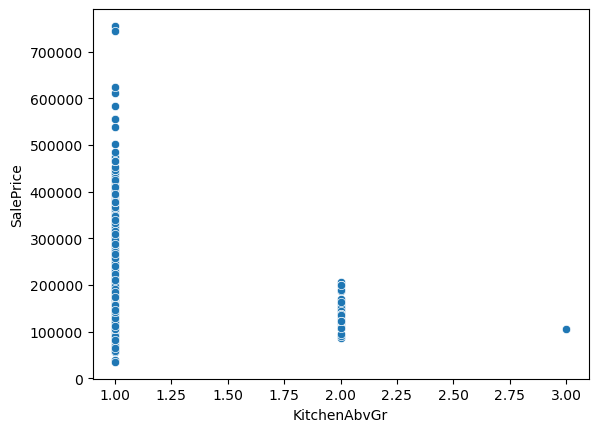

In [135]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'KitchenAbvGr' , y = 'SalePrice')

<Axes: xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

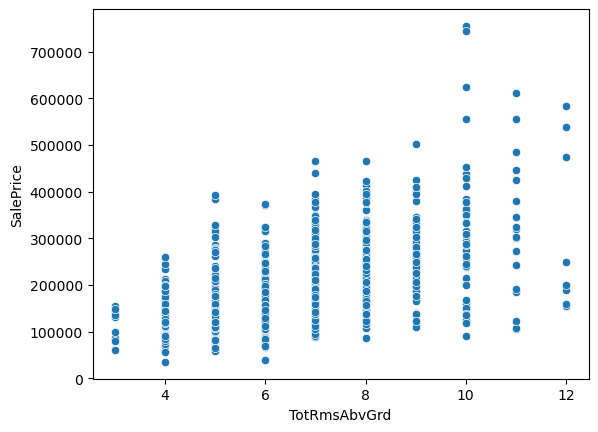

In [136]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'TotRmsAbvGrd' , y = 'SalePrice')

<Axes: xlabel='Fireplaces', ylabel='SalePrice'>

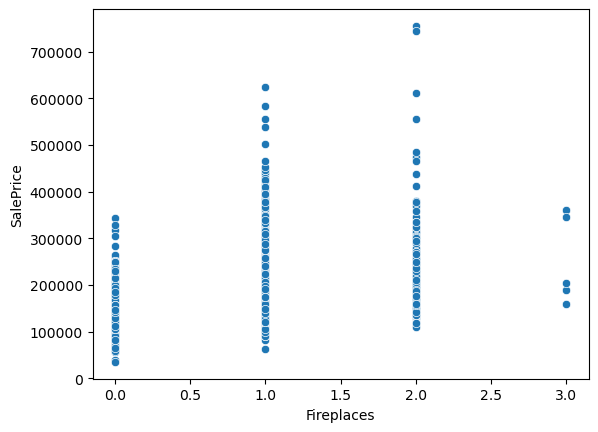

In [137]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'Fireplaces' , y = 'SalePrice')

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

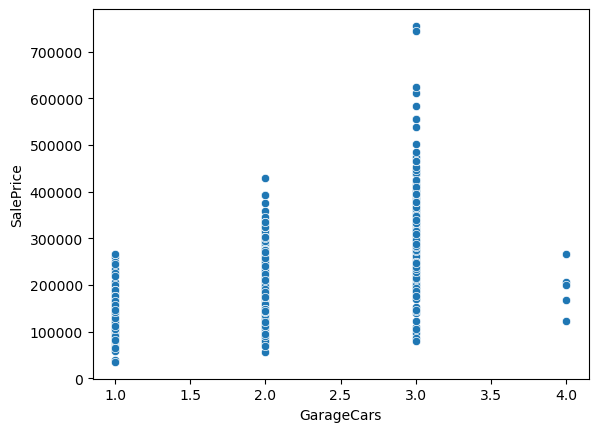

In [138]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'GarageCars' , y = 'SalePrice')

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

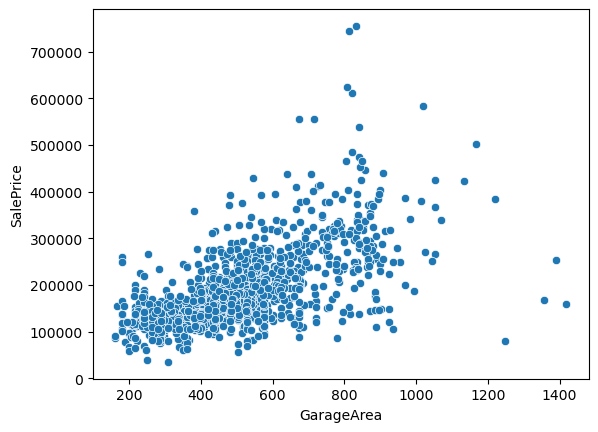

In [139]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'GarageArea' , y = 'SalePrice')

<Axes: xlabel='WoodDeckSF', ylabel='SalePrice'>

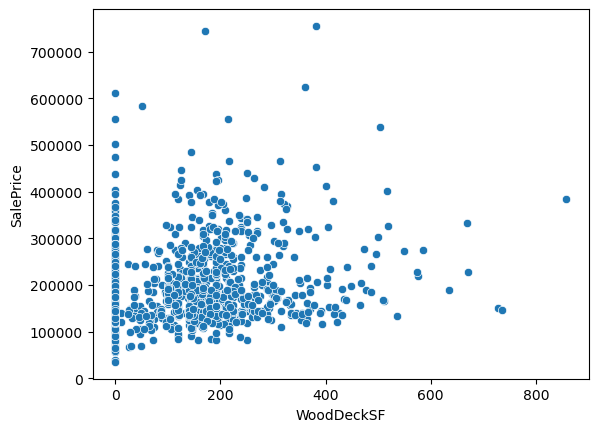

In [140]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'WoodDeckSF' , y = 'SalePrice')

<Axes: xlabel='OpenPorchSF', ylabel='SalePrice'>

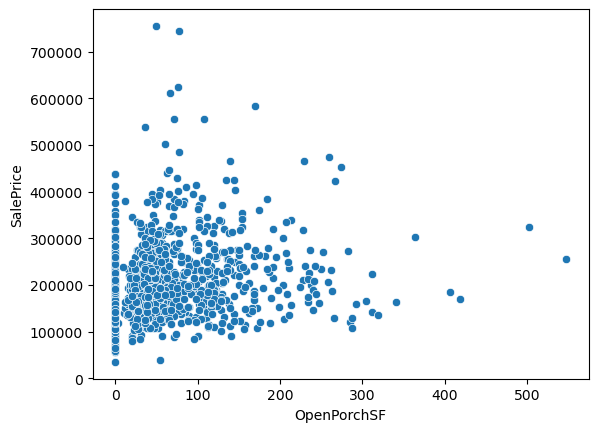

In [141]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'OpenPorchSF' , y = 'SalePrice')

<Axes: xlabel='EnclosedPorch', ylabel='SalePrice'>

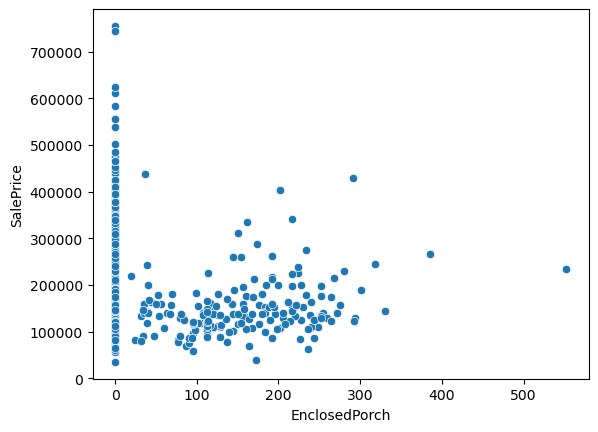

In [142]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'EnclosedPorch' , y = 'SalePrice')

<Axes: xlabel='3SsnPorch', ylabel='SalePrice'>

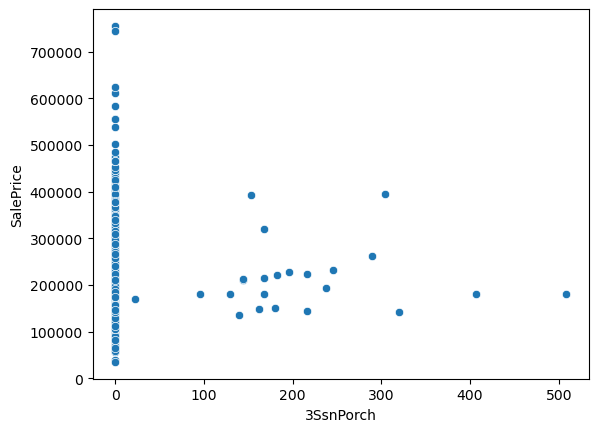

In [143]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = '3SsnPorch' , y = 'SalePrice')

<Axes: xlabel='ScreenPorch', ylabel='SalePrice'>

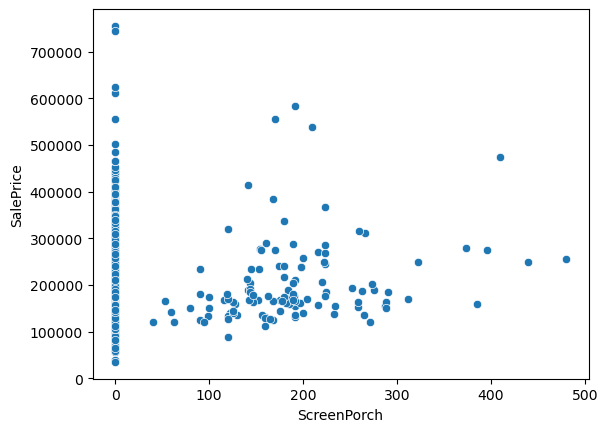

In [144]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'ScreenPorch' , y = 'SalePrice')

<Axes: xlabel='PoolArea', ylabel='SalePrice'>

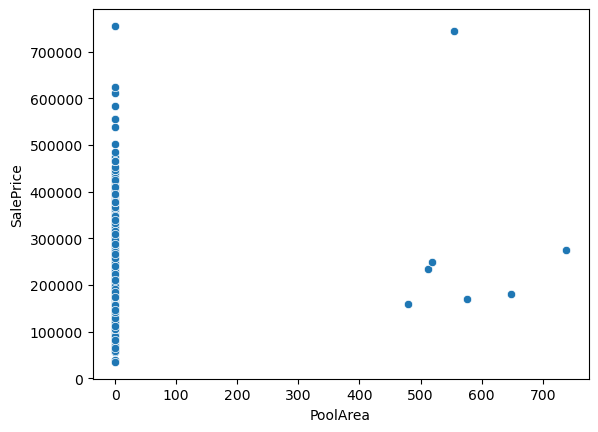

In [145]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'PoolArea' , y = 'SalePrice')

<Axes: xlabel='MiscVal', ylabel='SalePrice'>

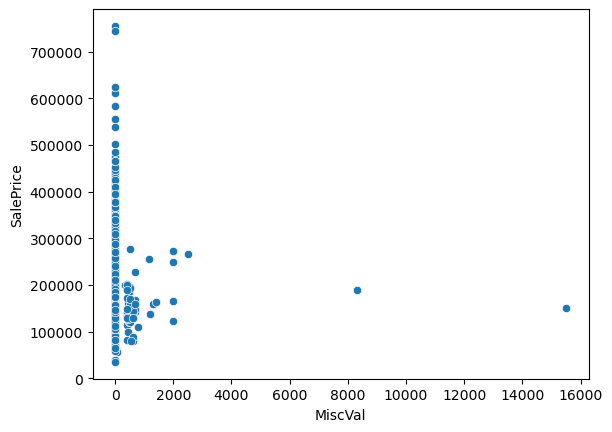

In [146]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'MiscVal' , y = 'SalePrice')

<Axes: xlabel='MoSold', ylabel='SalePrice'>

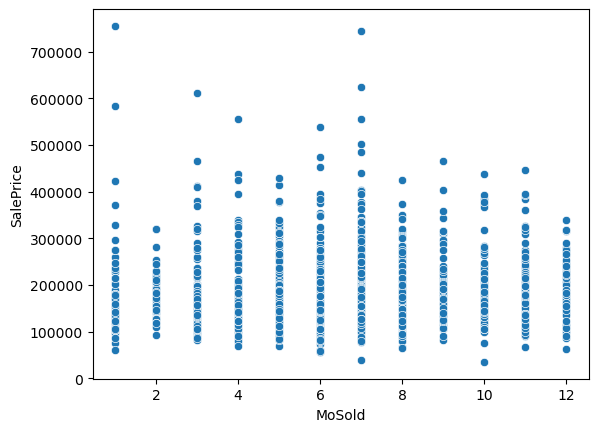

In [147]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'MoSold' , y = 'SalePrice')

<Axes: xlabel='YrSold', ylabel='SalePrice'>

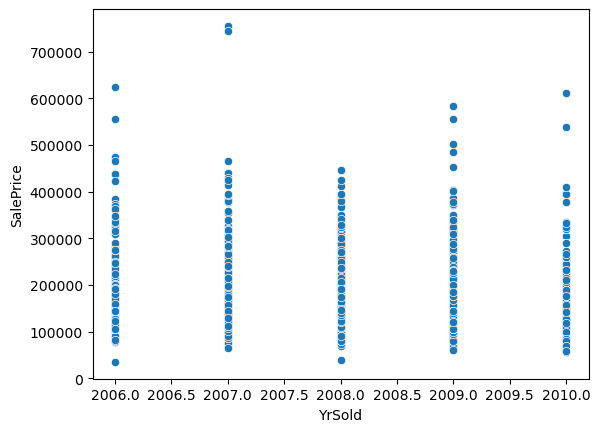

In [148]:
# Plotting a scatter plot
sns.scatterplot( data = rental , x = 'YrSold' , y = 'SalePrice')

In [149]:
rental.drop(columns=['Id',
'LotArea',
'LowQualFinSF',
'BsmtFullBath',
'BsmtHalfBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'KitchenQual',
'3SsnPorch',
'PoolArea',
'MiscVal',
'MoSold',
'YrSold'], inplace=True)

In [150]:
rental.drop(columns=['GarageCars',
'TotalBsmtSF'], inplace=True)

In [151]:
rental.drop(columns=['MSSubClass','OverallCond','BsmtFinSF2','EnclosedPorch'], inplace=True)

In [152]:
rental.head(10)

MSZoning  LotFrontage LotShape Neighborhood Condition1 BldgType HouseStyle  \
0       RL         65.0      Reg      CollgCr       Norm     1Fam     2Story   
1       RL         80.0      Reg      Veenker      Feedr     1Fam     1Story   
2       RL         68.0      IR1      CollgCr       Norm     1Fam     2Story   
3       RL         60.0      IR1      Crawfor       Norm     1Fam     2Story   
4       RL         84.0      IR1      NoRidge       Norm     1Fam     2Story   
5       RL         85.0      IR1      Mitchel       Norm     1Fam     1.5Fin   
6       RL         75.0      Reg      Somerst       Norm     1Fam     1Story   
7       RL         70.0      IR1       NWAmes       PosN     1Fam     2Story   
8       RM         51.0      Reg      OldTown     Artery     1Fam     1.5Fin   
9       RL         50.0      Reg      BrkSide     Artery   2fmCon     1.5Unf   

   OverallQual  YearBuilt  YearRemodAdd  ... GarageFinish GarageArea  \
0            7       2003          2003  ...          RFn        548   
1            6       1976          1976  ...          RFn        460   
2            7       2001          2002  ...          RFn        608   
3            7       1915          1970  ...          Unf        642   
4            8       2000          2000  ...          RFn        836   
5            5       1993          1995  ...          Unf        480   
6            8       2004          2005  ...          RFn        636   
7            7       1973          1973  ...          RFn        484   
8            7       1931          1950  ...          Unf        468   
9            5       1939          1950  ...          RFn        205   

  GarageQual GarageCond  WoodDeckSF OpenPorchSF ScreenPorch SaleType  \
0         TA         TA           0          61           0       WD   
1         TA         TA         298           0           0       WD   
2         TA         TA           0          42           0       WD   
3         TA         TA           0          35           0       WD   
4         TA         TA         192          84           0       WD   
5         TA         TA          40          30           0       WD   
6         TA         TA         255          57           0       WD   
7         TA         TA         235         204           0       WD   
8         Fa         TA          90           0           0       WD   
9         Gd         TA           0           4           0       WD   

  SaleCondition SalePrice  
0        Normal    208500  
1        Normal    181500  
2        Normal    223500  
3       Abnorml    140000  
4        Normal    250000  
5        Normal    143000  
6        Normal    307000  
7        Normal    200000  
8       Abnorml    129900  
9        Normal    118000  

[10 rows x 42 columns]

In [153]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1459
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1349 non-null   object 
 1   LotFrontage    1349 non-null   float64
 2   LotShape       1349 non-null   object 
 3   Neighborhood   1349 non-null   object 
 4   Condition1     1349 non-null   object 
 5   BldgType       1349 non-null   object 
 6   HouseStyle     1349 non-null   object 
 7   OverallQual    1349 non-null   int64  
 8   YearBuilt      1349 non-null   int64  
 9   YearRemodAdd   1349 non-null   int64  
 10  RoofStyle      1349 non-null   object 
 11  Exterior1st    1349 non-null   object 
 12  Exterior2nd    1349 non-null   object 
 13  MasVnrType     1349 non-null   object 
 14  MasVnrArea     1349 non-null   float64
 15  ExterQual      1349 non-null   object 
 16  ExterCond      1349 non-null   object 
 17  Foundation     1349 non-null   object 
 18  BsmtQual

In [154]:
rental['YearBuilt'] = rental['YearBuilt'].astype(str)

In [155]:
rental['YearRemodAdd'] = rental['YearRemodAdd'].astype(str)

In [156]:
# split into X and y
X = rental.loc[:, ['MSZoning','LotFrontage','LotShape',
'Neighborhood','Condition1','BldgType','HouseStyle','OverallQual','YearBuilt','YearRemodAdd','RoofStyle',
'Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinSF1','BsmtUnfSF','HeatingQC','CentralAir','1stFlrSF','2ndFlrSF','GrLivArea','FullBath',
'TotRmsAbvGrd','Fireplaces','GarageType','GarageFinish','GarageArea','GarageQual','GarageCond',
'WoodDeckSF','OpenPorchSF','ScreenPorch','SaleType','SaleCondition']] # predictors in variable X

y = rental['SalePrice'] # response variable in Y


In [157]:
# creating dummy variables for categorical variables

# subset all categorical variables
rental_categorical = X.select_dtypes(include=['object'])
rental_categorical.head()

MSZoning LotShape Neighborhood Condition1 BldgType HouseStyle YearBuilt  \
0       RL      Reg      CollgCr       Norm     1Fam     2Story      2003   
1       RL      Reg      Veenker      Feedr     1Fam     1Story      1976   
2       RL      IR1      CollgCr       Norm     1Fam     2Story      2001   
3       RL      IR1      Crawfor       Norm     1Fam     2Story      1915   
4       RL      IR1      NoRidge       Norm     1Fam     2Story      2000   

  YearRemodAdd RoofStyle Exterior1st  ... BsmtCond BsmtExposure HeatingQC  \
0         2003     Gable     VinylSd  ...       TA           No        Ex   
1         1976     Gable     MetalSd  ...       TA           Gd        Ex   
2         2002     Gable     VinylSd  ...       TA           Mn        Ex   
3         1970     Gable     Wd Sdng  ...       Gd           No        Gd   
4         2000     Gable     VinylSd  ...       TA           Av        Ex   

  CentralAir GarageType GarageFinish GarageQual GarageCond SaleType  \
0          Y     Attchd          RFn         TA         TA       WD   
1          Y     Attchd          RFn         TA         TA       WD   
2          Y     Attchd          RFn         TA         TA       WD   
3          Y     Detchd          Unf         TA         TA       WD   
4          Y     Attchd          RFn         TA         TA       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 26 columns]

In [158]:
# convert into dummies - one hot encoding
rental_dummies = pd.get_dummies(rental_categorical, drop_first=True)
rental_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  Neighborhood_Blueste  Neighborhood_BrDale  \
0             0             1                     0                    0   
1             0             1                     0                    0   
2             0             0                     0                    0   
3             0             0                     0                    0   
4             0             0                     0                    0   

   Neighborhood_BrkSide  ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0                     0  ...               0               0             0   
1                     0  ...               0               0             0   
2                     0  ...               0               0             0   
3                     0  ...               0               0             0   
4                     0  ...               0               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0             0            1                      0                     0   
1             0            1                      0                     0   
2             0            1                      0                     0   
3             0            1                      0                     0   
4             0            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 306 columns]

In [159]:
X.head(5)

MSZoning  LotFrontage LotShape Neighborhood Condition1 BldgType HouseStyle  \
0       RL         65.0      Reg      CollgCr       Norm     1Fam     2Story   
1       RL         80.0      Reg      Veenker      Feedr     1Fam     1Story   
2       RL         68.0      IR1      CollgCr       Norm     1Fam     2Story   
3       RL         60.0      IR1      Crawfor       Norm     1Fam     2Story   
4       RL         84.0      IR1      NoRidge       Norm     1Fam     2Story   

   OverallQual YearBuilt YearRemodAdd  ... GarageType GarageFinish GarageArea  \
0            7      2003         2003  ...     Attchd          RFn        548   
1            6      1976         1976  ...     Attchd          RFn        460   
2            7      2001         2002  ...     Attchd          RFn        608   
3            7      1915         1970  ...     Detchd          Unf        642   
4            8      2000         2000  ...     Attchd          RFn        836   

  GarageQual  GarageCond WoodDeckSF OpenPorchSF ScreenPorch SaleType  \
0         TA          TA          0          61           0       WD   
1         TA          TA        298           0           0       WD   
2         TA          TA          0          42           0       WD   
3         TA          TA          0          35           0       WD   
4         TA          TA        192          84           0       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 41 columns]

In [160]:
# drop categorical variables 
X = X.drop(list(rental_categorical.columns), axis=1)

In [161]:
# concat dummy variables with X
X = pd.concat([X, rental_dummies], axis=1)

In [162]:
X.head()

LotFrontage  OverallQual  MasVnrArea  BsmtFinSF1  BsmtUnfSF  1stFlrSF  \
0         65.0            7       196.0         706        150       856   
1         80.0            6         0.0         978        284      1262   
2         68.0            7       162.0         486        434       920   
3         60.0            7         0.0         216        540       961   
4         84.0            8       350.0         655        490      1145   

   2ndFlrSF  GrLivArea  FullBath  TotRmsAbvGrd  ...  SaleType_ConLI  \
0       854       1710         2             8  ...               0   
1         0       1262         2             6  ...               0   
2       866       1786         2             6  ...               0   
3       756       1717         1             7  ...               0   
4      1053       2198         2             9  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 321 columns]

In [163]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1459
Columns: 321 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(2), int64(13), uint8(306)
memory usage: 571.7 KB
None


In [164]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=321)

In [165]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=42)

In [166]:
## View dimensions of train data
print(X_train.shape)
print(y_train.shape)


(944, 321)
(944,)


In [167]:
print(X_test.shape)
print(y_test.shape)


(405, 321)
(405,)


## Scaling Numerical Variables

In [168]:
## Create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols



['LotFrontage',
 'OverallQual',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Conditio

In [169]:
from sklearn.linear_model import Ridge, Lasso

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error



In [170]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])



In [171]:
X_train.head(10)



LotFrontage  OverallQual  MasVnrArea  BsmtFinSF1  BsmtUnfSF  1stFlrSF  \
12       0.167808        0.375    0.000000    0.130581   0.074914  0.102564   
538      0.229452        0.750    0.130000    0.258682   0.174658  0.367521   
171      0.167808        0.750    0.000000    0.052622   0.238014  0.253799   
596      0.133562        0.250    0.000000    0.000000   0.323202  0.065290   
1237     0.167808        0.750    0.093125    0.000000   0.549658  0.190883   
260      0.099315        0.500    0.000000    0.076187   0.490154  0.259972   
672      0.106164        0.250    0.000000    0.026931   0.268836  0.087369   
1313     0.109589        0.500    0.000000    0.063785   0.303510  0.139839   
676      0.202055        0.375    0.000000    0.105245   0.115582  0.157645   
1111     0.195205        0.375    0.000000    0.139617   0.114726  0.141026   

      2ndFlrSF  GrLivArea  FullBath  TotRmsAbvGrd  ...  SaleType_ConLI  \
12    0.000000   0.083688  0.333333      0.111111  ...             0.0   
538   0.000000   0.299884  0.666667      0.444444  ...             0.0   
171   0.629274   0.435296  0.666667      0.777778  ...             0.0   
596   0.403312   0.199535  0.333333      0.444444  ...             0.0   
1237  0.472756   0.327199  0.666667      0.444444  ...             0.0   
260   0.000000   0.212127  0.666667      0.222222  ...             0.0   
672   0.000000   0.141031  0.333333      0.222222  ...             0.0   
1313  0.000000   0.114103  0.666667      0.111111  ...             0.0   
676   0.000000   0.128632  0.333333      0.333333  ...             0.0   
1111  0.000000   0.115072  0.333333      0.333333  ...             0.0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
12               0.0           0.0           0.0          1.0   
538              0.0           1.0           0.0          0.0   
171              0.0           0.0           0.0          1.0   
596              0.0           0.0           0.0          1.0   
1237             0.0           0.0           0.0          1.0   
260              0.0           0.0           0.0          1.0   
672              0.0           0.0           0.0          1.0   
1313             0.0           0.0           0.0          1.0   
676              0.0           0.0           0.0          1.0   
1111             0.0           0.0           0.0          1.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
12                      0.0                   0.0                   0.0   
538                     0.0                   0.0                   0.0   
171                     0.0                   0.0                   0.0   
596                     0.0                   0.0                   0.0   
1237                    0.0                   0.0                   0.0   
260                     0.0                   0.0                   0.0   
672                     0.0                   0.0                   0.0   
1313                    0.0                   0.0                   0.0   
676                     0.0                   0.0                   0.0   
1111                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
12                     1.0                    0.0  
538                    0.0                    1.0  
171                    1.0                    0.0  
596                    1.0                    0.0  
1237                   1.0                    0.0  
260                    1.0                    0.0  
672                    1.0                    0.0  
1313                   1.0                    0.0  
676                    1.0                    0.0  
1111                   1.0                    0.0  

[10 rows x 321 columns]

In [172]:
X_train.describe()

LotFrontage  OverallQual  MasVnrArea  BsmtFinSF1   BsmtUnfSF  \
count   944.000000   944.000000  944.000000  944.000000  944.000000   
mean      0.169985     0.528734    0.073464    0.085090    0.245674   
std       0.071924     0.167790    0.120929    0.083783    0.187565   
min       0.000000     0.000000    0.000000    0.000000    0.000000   
25%       0.133562     0.375000    0.000000    0.000000    0.104238   
50%       0.167808     0.500000    0.000000    0.076719    0.206122   
75%       0.202055     0.625000    0.114375    0.133416    0.347175   
max       1.000000     1.000000    1.000000    1.000000    1.000000   

         1stFlrSF    2ndFlrSF   GrLivArea    FullBath  TotRmsAbvGrd  ...  \
count  944.000000  944.000000  944.000000  944.000000    944.000000  ...   
mean     0.167174    0.183921    0.203819    0.521186      0.391596  ...   
std      0.093107    0.234128    0.102223    0.184272      0.175903  ...   
min      0.000000    0.000000    0.000000    0.000000      0.000000  ...   
25%      0.099715    0.000000    0.127906    0.333333      0.222222  ...   
50%      0.146961    0.000000    0.193336    0.666667      0.333333  ...   
75%      0.224003    0.395032    0.251065    0.666667      0.444444  ...   
max      1.000000    1.000000    1.000000    1.000000      1.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count      944.000000      944.000000    944.000000    944.000000   
mean         0.004237        0.004237      0.086864      0.001059   
std          0.064991        0.064991      0.281786      0.032547   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count   944.000000             944.000000            944.000000   
mean      0.858051               0.001059              0.008475   
std       0.349183               0.032547              0.091715   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count            944.000000            944.000000             944.000000  
mean               0.013771              0.811441               0.090042  
std                0.116602              0.391366               0.286394  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 321 columns]

In [173]:


# Assuming you have y_train and y_test as NumPy arrays
# You can also convert them to NumPy arrays if they are not already

# Define the min and max values for scaling (usually 0 and 1)
min_value = 0
max_value = 1

# Calculate the min and max values of y_train
min_y = np.min(y_train)
max_y = np.max(y_train)

# Apply min-max scaling to y_train
y_train = (y_train - min_y) / (max_y - min_y) * (max_value - min_value) + min_value

# Apply the same scaling to y_test using the min and max values from y_train
y_test = (y_test - min_y) / (max_y - min_y) * (max_value - min_value) + min_value


In [174]:
y_train

12      0.151022
585     0.464908
190     0.388625
651     0.101001
1342    0.268434
          ...   
1188    0.221886
1226    0.248286
1400    0.117674
929     0.259402
1222    0.149633
Name: SalePrice, Length: 944, dtype: float64

In [175]:
y_test 

316     0.312203
1124    0.178673
581     0.302884
377     0.423362
1166    0.291847
          ...   
346     0.161443
1130    0.138517
87      0.179507
142     0.181591
845     0.188538
Name: SalePrice, Length: 405, dtype: float64

## 3. Model Building and Evaluation

## Linear Regression

Let's now try predicting car prices, a dataset using linear regression.

In [176]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [177]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

0.003378931102379662
[-1.42876507e-01  1.10885977e-01  4.14479067e-02  2.64539036e-02
 -3.51047514e-02  1.84446386e-01  1.27395451e-01  2.14319960e-02
  2.55277054e-02  6.07751899e-02  2.77181725e-02  7.37406317e-02
  3.78032002e-02 -1.66033783e-02  2.16977592e-02  8.55368161e-02
  8.84291488e-02  8.40480319e-02  6.56267648e-02  2.35392721e-02
 -5.46728250e-02  7.52416001e-03  1.42951441e+10  2.32786666e-02
  3.03983818e-02  2.39474570e-02  2.68314067e-02  5.81512165e-02
 -1.05276572e-02  2.63473337e-02  2.19393405e-02  2.49649224e-02
  1.50149602e-02  7.73453712e-03  3.57469618e-02  1.52666569e-02
  1.20719254e-01  7.51366615e-02  2.53984928e-02  1.86536312e-02
  1.71391964e-02  3.28770280e-02  4.05292511e-02  8.16972256e-02
  1.28570385e-02  4.55850065e-02 -3.99363041e-03  2.12054253e-02
  2.62932777e-02 -2.49183178e-03 -1.15547180e-02  2.42843628e-02
  2.34078765e-02  3.54093909e-02 -4.73333597e-02 -3.99060249e-02
 -4.02320623e-02 -3.13216448e-02  2.72985697e-02  2.44306922e-02
 -8.

In [178]:
from sklearn.metrics import r2_score, mean_squared_error

In [179]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)



metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)



0.9077703918519413
-7.058079956017392e+22
1.1093366967540477
2.9789193476740125e+23
0.001175144805883525
7.355356414009908e+20


## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [200]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [201]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 8.0}


In [202]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.08491209e-02  8.91480339e-02  3.72087926e-02  3.17712139e-02
 -1.33384581e-02  4.35500303e-02  5.22673577e-02  5.51783831e-02
  2.71309573e-02  6.33309239e-02  3.44439801e-02  5.61404764e-02
  3.19322978e-02  7.35142560e-04  2.73735641e-02  5.52922102e-03
  5.95490059e-03  1.39317982e-02 -2.27751490e-03  2.60260869e-02
 -2.99583666e-02  1.20602908e-03  0.00000000e+00 -1.92751216e-03
  2.70385836e-03 -8.57251097e-03 -9.60101625e-03  2.35624815e-02
 -3.20555340e-02 -1.76423389e-02 -1.52921789e-02 -4.58815828e-03
 -1.43129919e-02 -1.55403390e-02  2.69587308e-03 -4.93929740e-03
  6.33753484e-02  4.18012352e-02 -7.92519500e-03 -1.54316588e-02
 -7.54923305e-03 -2.49700323e-03  1.12744554e-02  4.30428488e-02
 -1.06126623e-02  1.04212953e-02 -9.84591337e-03  1.17347128e-02
  7.01306208e-03 -5.56404754e-03 -3.42714090e-03  4.34832776e-03
 -1.24601917e-03  4.63733102e-03 -1.89339987e-02 -1.45127781e-02
 -2.94622781e-02 -2.55741768e-02  3.20089401e-03  1.14022541e-02
  4.31658882e-03  1.05572

In [203]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)





0.875695534884308
0.7974415409750077
1.4951327181381175
0.8549142491792654
0.001583827031925972
0.002110899380689544


## Lasso Regression

In [204]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [205]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [206]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [207]:
lasso.coef_

array([-8.91646544e-02,  1.43089095e-01,  3.63243846e-02,  2.79290452e-02,
       -2.62663461e-02,  0.00000000e+00,  3.93328119e-02,  2.31142249e-01,
        7.80128428e-03,  4.56989620e-02,  2.49906071e-02,  6.37318628e-02,
        3.34300969e-02, -2.31160130e-03,  3.36096291e-02,  0.00000000e+00,
        0.00000000e+00,  6.53775941e-03, -2.68889629e-03,  2.78644148e-02,
       -5.47127513e-02,  2.62011366e-03,  0.00000000e+00,  0.00000000e+00,
        3.97064094e-03, -1.45932813e-03,  0.00000000e+00,  2.67613973e-02,
       -2.64148832e-02,  0.00000000e+00, -1.37046364e-02,  0.00000000e+00,
       -6.62619821e-03, -7.82068655e-03,  0.00000000e+00, -0.00000000e+00,
        8.47690683e-02,  5.20375800e-02, -8.55726072e-03, -1.98800233e-02,
       -0.00000000e+00,  6.02078188e-03,  1.93509158e-02,  5.90432474e-02,
       -0.00000000e+00,  1.22655305e-02, -7.79142973e-03,  1.27711426e-02,
        0.00000000e+00, -1.41167571e-03, -1.30349996e-04,  6.16912992e-03,
        0.00000000e+00,  

In [208]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)


0.8824316805268958
0.7987391391470922
1.414110433580576
0.8494376318493169
0.0014979983406573898
0.002097376868763745


In [209]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.077704e-01          0.875696          0.882432
1   R2 Score (Test)      -7.058080e+22          0.797442          0.798739
2       RSS (Train)       1.109337e+00          1.495133          1.414110
3        RSS (Test)       2.978919e+23          0.854914          0.849438
4       MSE (Train)       3.428039e-02          0.039797          0.038704
5        MSE (Test)       2.712076e+10          0.045945          0.045797

## Lets observe the changes in the coefficients after regularization


In [210]:
betas = pd.DataFrame(index=X.columns)

In [211]:
betas.rows = X.columns

In [212]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [213]:
pd.set_option('display.max_rows', None)
betas.head(80)

Linear     Ridge     Lasso
LotFrontage          -1.428765e-01 -0.020849 -0.089165
OverallQual           1.108860e-01  0.089148  0.143089
MasVnrArea            4.144791e-02  0.037209  0.036324
BsmtFinSF1            2.645390e-02  0.031771  0.027929
BsmtUnfSF            -3.510475e-02 -0.013338 -0.026266
1stFlrSF              1.844464e-01  0.043550  0.000000
2ndFlrSF              1.273955e-01  0.052267  0.039333
GrLivArea             2.143200e-02  0.055178  0.231142
FullBath              2.552771e-02  0.027131  0.007801
TotRmsAbvGrd          6.077519e-02  0.063331  0.045699
Fireplaces            2.771817e-02  0.034444  0.024991
GarageArea            7.374063e-02  0.056140  0.063732
WoodDeckSF            3.780320e-02  0.031932  0.033430
OpenPorchSF          -1.660338e-02  0.000735 -0.002312
ScreenPorch           2.169776e-02  0.027374  0.033610
MSZoning_FV           8.553682e-02  0.005529  0.000000
MSZoning_RH           8.842915e-02  0.005955  0.000000
MSZoning_RL           8.404803e-02  0.013932  0.006538
MSZoning_RM           6.562676e-02 -0.002278 -0.002689
LotShape_IR2          2.353927e-02  0.026026  0.027864
LotShape_IR3         -5.467282e-02 -0.029958 -0.054713
LotShape_Reg          7.524160e-03  0.001206  0.002620
Neighborhood_Blueste  1.429514e+10  0.000000  0.000000
Neighborhood_BrDale   2.327867e-02 -0.001928  0.000000
Neighborhood_BrkSide  3.039838e-02  0.002704  0.003971
Neighborhood_ClearCr  2.394746e-02 -0.008573 -0.001459
Neighborhood_CollgCr  2.683141e-02 -0.009601  0.000000
Neighborhood_Crawfor  5.815122e-02  0.023562  0.026761
Neighborhood_Edwards -1.052766e-02 -0.032056 -0.026415
Neighborhood_Gilbert  2.634733e-02 -0.017642  0.000000
Neighborhood_IDOTRR   2.193934e-02 -0.015292 -0.013705
Neighborhood_MeadowV  2.496492e-02 -0.004588  0.000000
Neighborhood_Mitchel  1.501496e-02 -0.014313 -0.006626
Neighborhood_NAmes    7.734537e-03 -0.015540 -0.007821
Neighborhood_NPkVill  3.574696e-02  0.002696  0.000000
Neighborhood_NWAmes   1.526666e-02 -0.004939 -0.000000
Neighborhood_NoRidge  1.207193e-01  0.063375  0.084769
Neighborhood_NridgHt  7.513666e-02  0.041801  0.052038
Neighborhood_OldTown  2.539849e-02 -0.007925 -0.008557
Neighborhood_SWISU    1.865363e-02 -0.015432 -0.019880
Neighborhood_Sawyer   1.713920e-02 -0.007549 -0.000000
Neighborhood_SawyerW  3.287703e-02 -0.002497  0.006021
Neighborhood_Somerst  4.052925e-02  0.011274  0.019351
Neighborhood_StoneBr  8.169723e-02  0.043043  0.059043
Neighborhood_Timber   1.285704e-02 -0.010613 -0.000000
Neighborhood_Veenker  4.558501e-02  0.010421  0.012266
Condition1_Feedr     -3.993630e-03 -0.009846 -0.007791
Condition1_Norm       2.120543e-02  0.011735  0.012771
Condition1_PosA       2.629328e-02  0.007013  0.000000
Condition1_PosN      -2.491832e-03 -0.005564 -0.001412
Condition1_RRAe      -1.155472e-02 -0.003427 -0.000130
Condition1_RRAn       2.428436e-02  0.004348  0.006169
Condition1_RRNe       2.340788e-02 -0.001246  0.000000
Condition1_RRNn       3.540939e-02  0.004637  0.000000
BldgType_2fmCon      -4.733336e-02 -0.018934 -0.018426
BldgType_Duplex      -3.990602e-02 -0.014513 -0.020423
BldgType_Twnhs       -4.023206e-02 -0.029462 -0.043027
BldgType_TwnhsE      -3.132164e-02 -0.025574 -0.032842
HouseStyle_1.5Unf     2.729857e-02  0.003201  0.000000
HouseStyle_1Story     2.443069e-02  0.011402  0.020888
HouseStyle_2.5Fin    -8.333117e-02  0.004317 -0.000000
HouseStyle_2.5Unf     7.906175e-02  0.001056 -0.000000
HouseStyle_2Story    -1.805186e-02 -0.005831 -0.010229
HouseStyle_SFoyer     2.344751e-02  0.000946  0.005755
HouseStyle_SLvl       8.098364e-03 -0.006046  0.000000
YearBuilt_1882       -8.806998e+08  0.000000  0.000000
YearBuilt_1885       -4.758641e-02 -0.006124 -0.000000
YearBuilt_1890       -1.097566e-01 -0.006638 -0.000000
YearBuilt_1892       -2.224127e-01  0.012797  0.000000
YearBuilt_1893       -1.582925e+09  0.000000  0.000000
YearBuilt_1898       -2.655718e-01 -0.006645 -0.000000
YearBuilt_1900       -5.394793e-02 -0.005058 -0.000000
YearBuilt_190